<div style="background-color: #BED1CF; padding: 10px; border-radius: 5px;">
  <h1 style="color: dark; font-size: 32px;">Projet 6 : Analysez les ventes d'une librairie avec Python</h1>
</div>

In [99]:
# Importation des Librairies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import pearsonr
from scipy.stats import levene
from scipy.stats import shapiro, spearmanr
from scipy.stats import chi2_contingency
from scipy.stats import kstest
from scipy.stats import norm
from scipy.stats import linregress
from scipy.stats import kruskal




In [2]:
# Creation de nos dataframe à partir des importation des nos fichiers csv

clients = pd.read_csv("customers.csv" ,delimiter=';')
produits = pd.read_csv("products.csv",delimiter=';')
transactions = pd.read_csv("transactions.csv", delimiter=';')

<div style="background-color: #E78895; color: dark; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 22px;">1-Exploration des données et jointure</h1>
</div>

<div style="background-color: #FFE4C9; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">1.1-Clients</h1>
</div>

In [3]:
# affichage de la table

clients.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
# informations concernant le dataframe

clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [5]:
# informations concernant le dataframe

clients.describe(include="all")

,client_id,sex,birth
count,8621,8621,8621.000000
unique,8621,2,NaN
top,c_4410,f,NaN
freq,1,4490,NaN
mean,NaN,NaN,1978.275606
std,NaN,NaN,16.917958
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


Un âge serait sans doute plus explicite qu'une date de naissance.

In [6]:
# Obtenir la date et l'année en cours
currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
année = int(date.strftime("%Y"))

print("Année en cours:", année)

Année en cours: 2024


In [7]:
# Calculer l'âge des clients
clients["Âge"] = année - clients["birth"]

# Afficher le DataFrame avec la nouvelle variable "Âge"
clients

,client_id,sex,birth,Âge
0,c_4410,f,1967,57
1,c_7839,f,1975,49
2,c_1699,f,1984,40
3,c_5961,f,1962,62
4,c_5320,m,1943,81
...,...,...,...,...
8616,c_7920,m,1956,68
8617,c_7403,f,1970,54
8618,c_5119,m,1974,50
8619,c_5643,f,1968,56


In [8]:
# verification de l'unicité

doublons_id = clients['client_id'].duplicated().sum()

print("Nombre de doublons dans clients_id:", doublons_id)

Nombre de doublons dans clients_id: 0


In [9]:
# Affichage du nombre de valeurs null

clients.isnull().sum()

client_id    0
sex          0
birth        0
Âge          0
dtype: int64

La clé primaire client_id est unique, et aucune valeur nulle n'est présente dans notre DataFrame clients.

<div style="background-color: #FFE4C9; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">1.2-Produits</h1>
</div>

In [10]:
# affichage de la table

produits.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [11]:
# informations concernant le dataframe

produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


In [12]:
# informations concernant le dataframe

produits.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [13]:
# verification de l'unicité

doublons_id2 = produits['id_prod'].duplicated().sum()

print("Nombre de doublons dans id_prod:", doublons_id2)

Nombre de doublons dans id_prod: 0


In [14]:
# Affichage du nombre de valeurs null

produits.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

La clé primaire id_produit est unique, et aucune valeur nulle n'est présente dans notre DataFrame clients.

<div style="background-color: #FFE4C9; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">1.3-Transactions</h1>
</div>

In [15]:
# affichage de la table

transactions.head()

,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


In [16]:
l_produits_id = transactions.loc[transactions['session_id'].isin(['s_111029', 's_102918'])]

# client_id 'c_8253', 'c_3789', 'c_4406', 'c_2706', 'c_3443'
l_produits_id

,id_prod,date,session_id,client_id
199587,1_271,2021-10-03 24:13:06.459676,s_111029,c_5837
199588,1_166,2021-10-03 24:13:49.459676,s_111029,c_5837
199589,1_257,2021-10-03 24:13:7.279926,s_111029,c_5837
200766,1_325,2021-10-04 24:13:06.709950,s_102918,c_2642
200767,1_25,2021-10-04 24:13:8.709950,s_102918,c_2642


In [17]:
# informations concernant le dataframe

transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     687534 non-null  object
 1   date        687534 non-null  object
 2   session_id  687534 non-null  object
 3   client_id   687534 non-null  object
dtypes: object(4)
memory usage: 21.0+ MB


La variable date n'est pas au bon format 

In [18]:
# Remplacer " 24:" par " 00:" dans la colonne 'date' uniquement pour les heures

transactions['date'] = transactions['date'].str.replace(r' 24:(\d{2}:\d{2})', r' 00:\1', regex=True)

In [19]:
# Convertir la colonne en objets de date et d'heure, en traitant les erreurs avec 'coerce'

transactions['date'] = pd.to_datetime(transactions['date'], errors='coerce')

In [20]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     687534 non-null  object        
 1   date        687532 non-null  datetime64[ns]
 2   session_id  687534 non-null  object        
 3   client_id   687534 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 21.0+ MB


In [21]:
# Filtrer les lignes avec des valeurs nulles dans la colonne 'date'
transactions_null_dates = transactions[transactions['date'].isna()]

transactions_null_dates

,id_prod,date,session_id,client_id
199589,1_257,NaT,s_111029,c_5837
200767,1_25,NaT,s_102918,c_2642


In [22]:
# Insérer les dates et les horaires correspondants dans la colonne 'date' du DataFrame "transactions"

transactions.loc[199589, 'date'] = pd.to_datetime('2021-10-03 00:13:7.279926')
transactions.loc[200767, 'date'] = pd.to_datetime('2021-10-04 00:13:8.709950')

In [23]:
# Filtrer les lignes où l'heure est égale à 24
transactions_24_hours = transactions.loc[transactions['date'].dt.hour == 24]

transactions_24_hours

,id_prod,date,session_id,client_id


In [24]:
# informations concernant le dataframe

transactions.describe()

,date
count,687534
mean,2022-03-01 21:23:32.196942848
min,2021-03-01 00:01:07.843138
25%,2021-09-10 10:35:20.642323456
50%,2022-02-27 06:50:25.400120064
75%,2022-08-28 22:16:49.841665536
max,2023-02-28 23:58:30.792755


In [25]:
# Filtrer les lignes avec des valeurs en double dans transactions
doublons = transactions[transactions.duplicated()]

# Afficher les premiers quelques doublons pour examen
doublons.head()

,id_prod,date,session_id,client_id


In [26]:
# Supprimer les lignes avec des valeurs nulles dans la colonne 'date'

transactions = transactions.dropna(subset=['date'])

In [27]:
#Création des colonnes pour l'année, le mois et le jour

transactions["Année"] = transactions['date'].dt.strftime('%Y')
transactions["Mois"] = transactions['date'].dt.strftime('%m')
transactions["Jours"] = transactions['date'].dt.strftime('%d')
transactions

,id_prod,date,session_id,client_id,Année,Mois,Jours
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,2021,03,01
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,2021,03,01
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,2021,03,01
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,2021,03,01
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,2021,03,01
...,...,...,...,...,...,...,...
687529,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,2023,02,28
687530,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,2023,02,28
687531,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,2023,02,28
687532,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,2023,02,28


In [28]:
# Affichage du nombre de valeurs null

transactions.isnull().sum()


id_prod       0
date          0
session_id    0
client_id     0
Année         0
Mois          0
Jours         0
dtype: int64

<div style="background-color: #FFE4C9; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">1.4-Jointure</h1>
</div>

In [29]:
#Création d'un dataframe global qui fusionne les tables transactions, produits et clients

df = pd.merge(transactions,produits, how='left', on='id_prod', indicator="Jointure")
df = df.merge(clients, how='right', on='client_id', indicator="merge")
df

,id_prod,date,session_id,client_id,Année,Mois,Jours,price,categ,Jointure,sex,birth,Âge,merge
0,1_483,2021-03-13 21:35:55.949042,s_5913,c_4410,2021,03,13,15.99,1.0,both,f,1967,57,both
1,0_1111,2021-03-22 01:27:49.480137,s_9707,c_4410,2021,03,22,19.99,0.0,both,f,1967,57,both
2,1_385,2021-03-22 01:40:22.782925,s_9707,c_4410,2021,03,22,25.99,1.0,both,f,1967,57,both
3,0_1455,2021-03-22 14:29:25.189266,s_9942,c_4410,2021,03,22,8.99,0.0,both,f,1967,57,both
4,0_1420,2021-03-22 22:31:25.825764,s_10092,c_4410,2021,03,22,11.53,0.0,both,f,1967,57,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687550,0_1472,2022-05-14 00:24:49.391917,s_208110,c_84,2022,05,14,12.49,0.0,both,f,1982,42,both
687551,0_1438,2022-05-29 06:11:50.316631,s_215697,c_84,2022,05,29,9.31,0.0,both,f,1982,42,both
687552,1_459,2022-12-17 00:16:56.629536,s_313173,c_84,2022,12,17,15.99,1.0,both,f,1982,42,both
687553,0_1104,2022-12-17 00:24:14.357525,s_313173,c_84,2022,12,17,13.21,0.0,both,f,1982,42,both


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687555 entries, 0 to 687554
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     687534 non-null  object        
 1   date        687534 non-null  datetime64[ns]
 2   session_id  687534 non-null  object        
 3   client_id   687555 non-null  object        
 4   Année       687534 non-null  object        
 5   Mois        687534 non-null  object        
 6   Jours       687534 non-null  object        
 7   price       687534 non-null  float64       
 8   categ       687534 non-null  float64       
 9   Jointure    687534 non-null  category      
 10  sex         687555 non-null  object        
 11  birth       687555 non-null  int64         
 12  Âge         687555 non-null  int64         
 13  merge       687555 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 64.3+ MB


In [31]:
# Rappel des compositions de nos differents DF

print(f"Le Dataframe clients est de taille : {clients.shape}\nLe Dataframe produits est de taille : {produits.shape}\nLe Dataframe transactions est de taille : {transactions.shape}")

Le Dataframe clients est de taille : (8621, 4)
Le Dataframe produits est de taille : (3286, 3)
Le Dataframe transactions est de taille : (687534, 7)


In [32]:
# Verification de la jointure

df["Jointure"].value_counts()

Jointure
both          687534
left_only          0
right_only         0
Name: count, dtype: int64

In [33]:
# Verification de la jointure

df["merge"].value_counts()

merge
both          687534
right_only        21
left_only          0
Name: count, dtype: int64

In [34]:
# Filtrer les lignes qui ont été fusionnées uniquement à droite
merged_only_right = df[df['merge'] == 'right_only']

# Afficher les lignes fusionnées uniquement à droite
merged_only_right

,id_prod,date,session_id,client_id,Année,Mois,Jours,price,categ,Jointure,sex,birth,Âge,merge
60134,NaN,NaT,NaN,c_8253,NaN,NaN,NaN,NaN,NaN,NaN,f,2001,23,right_only
202567,NaN,NaT,NaN,c_3789,NaN,NaN,NaN,NaN,NaN,NaN,f,1997,27,right_only
220670,NaN,NaT,NaN,c_4406,NaN,NaN,NaN,NaN,NaN,NaN,f,1998,26,right_only
222930,NaN,NaT,NaN,c_2706,NaN,NaN,NaN,NaN,NaN,NaN,f,1967,57,right_only
228157,NaN,NaT,NaN,c_3443,NaN,NaN,NaN,NaN,NaN,NaN,m,1959,65,right_only
251338,NaN,NaT,NaN,c_4447,NaN,NaN,NaN,NaN,NaN,NaN,m,1956,68,right_only
251898,NaN,NaT,NaN,c_3017,NaN,NaN,NaN,NaN,NaN,NaN,f,1992,32,right_only
264087,NaN,NaT,NaN,c_4086,NaN,NaN,NaN,NaN,NaN,NaN,f,1992,32,right_only
316669,NaN,NaT,NaN,c_6930,NaN,NaN,NaN,NaN,NaN,NaN,m,2004,20,right_only
323346,NaN,NaT,NaN,c_4358,NaN,NaN,NaN,NaN,NaN,NaN,m,1999,25,right_only


In [35]:

df_client_id_specifique = df.loc[df['client_id'] == 'c_8253']

# Afficher les lignes correspondant au client_id spécifique
df_client_id_specifique

,id_prod,date,session_id,client_id,Année,Mois,Jours,price,categ,Jointure,sex,birth,Âge,merge
60134,NaN,NaT,NaN,c_8253,NaN,NaN,NaN,NaN,NaN,NaN,f,2001,23,right_only


In [36]:
# Filtrer les lignes pour le client_id 'c_8253', 'c_3789', 'c_4406', 'c_2706', 'c_3443'
df_client_id = clients.loc[clients['client_id'].isin(['c_8253', 'c_3789', 'c_4406', 'c_2706', 'c_3443'])]

#client_id 'c_8253', 'c_3789', 'c_4406', 'c_2706', 'c_3443'
df_client_id

,client_id,sex,birth,Âge
801,c_8253,f,2001,23
2483,c_3789,f,1997,27
2734,c_4406,f,1998,26
2768,c_2706,f,1967,57
2850,c_3443,m,1959,65


In [37]:
# Filtrer les lignes pour le client_id 'c_8253', 'c_3789', 'c_4406', 'c_2706', 'c_3443'

transactions_client_id = transactions.loc[transactions['client_id'].isin(['c_8253', 'c_3789', 'c_4406', 'c_2706', 'c_3443'])]

# client_id 'c_8253', 'c_3789', 'c_4406', 'c_2706', 'c_3443'
transactions_client_id

,id_prod,date,session_id,client_id,Année,Mois,Jours


Aucune transaction n'est enregistrée pour ces clients. Ils n'ont apparemment effectué aucune transaction. Il faudrait vérifier avec l'équipe technique la véracité de cette information. Nous supprimerons ces données car elles n'auront aucun impact sur nos prochains calculs et analyses.

In [38]:
# Filtrer les lignes qui ont été fusionnées uniquement à droite
merged_only_right = df[df['merge'] == 'right_only']

# Supprimer les lignes fusionnées uniquement à droite du DataFrame df
df = df.drop(merged_only_right.index)


In [39]:
# Verification de la jointure

df["merge"].value_counts()

merge
both          687534
left_only          0
right_only         0
Name: count, dtype: int64

Nos jointures ont réussi. Supprimons maintenant les indicateurs 'jointure' et 'merge', et commençons nos analyses

In [40]:
# Supprimer les colonnes "jointure" et "merge" du DataFrame df

df.drop(['Jointure', 'merge'], axis=1, inplace=True)

# Afficher le DataFrame après suppression des colonnes "jointure" et "merge"

df

,id_prod,date,session_id,client_id,Année,Mois,Jours,price,categ,sex,birth,Âge
0,1_483,2021-03-13 21:35:55.949042,s_5913,c_4410,2021,03,13,15.99,1.0,f,1967,57
1,0_1111,2021-03-22 01:27:49.480137,s_9707,c_4410,2021,03,22,19.99,0.0,f,1967,57
2,1_385,2021-03-22 01:40:22.782925,s_9707,c_4410,2021,03,22,25.99,1.0,f,1967,57
3,0_1455,2021-03-22 14:29:25.189266,s_9942,c_4410,2021,03,22,8.99,0.0,f,1967,57
4,0_1420,2021-03-22 22:31:25.825764,s_10092,c_4410,2021,03,22,11.53,0.0,f,1967,57
...,...,...,...,...,...,...,...,...,...,...,...,...
687550,0_1472,2022-05-14 00:24:49.391917,s_208110,c_84,2022,05,14,12.49,0.0,f,1982,42
687551,0_1438,2022-05-29 06:11:50.316631,s_215697,c_84,2022,05,29,9.31,0.0,f,1982,42
687552,1_459,2022-12-17 00:16:56.629536,s_313173,c_84,2022,12,17,15.99,1.0,f,1982,42
687553,0_1104,2022-12-17 00:24:14.357525,s_313173,c_84,2022,12,17,13.21,0.0,f,1982,42


In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 687534 entries, 0 to 687554
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     687534 non-null  object        
 1   date        687534 non-null  datetime64[ns]
 2   session_id  687534 non-null  object        
 3   client_id   687534 non-null  object        
 4   Année       687534 non-null  object        
 5   Mois        687534 non-null  object        
 6   Jours       687534 non-null  object        
 7   price       687534 non-null  float64       
 8   categ       687534 non-null  float64       
 9   sex         687534 non-null  object        
 10  birth       687534 non-null  int64         
 11  Âge         687534 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 68.2+ MB


In [42]:
# Vérifier les valeurs NaN dans le DataFrame df
valeurs_nan = df.isna().sum()

# Afficher les valeurs NaN dans le DataFrame df
valeurs_nan

id_prod       0
date          0
session_id    0
client_id     0
Année         0
Mois          0
Jours         0
price         0
categ         0
sex           0
birth         0
Âge           0
dtype: int64

<div style="background-color: #E78895; color: dark; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 22px;">2-Analyses </h1>
</div>

<div style="background-color: #FFE4C9; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">2.1-Analyse univariée du prix</h1>
</div>

In [43]:
produits['price'].describe()

count    3286.000000
mean       21.863597
std        29.849786
min         0.620000
25%         6.990000
50%        13.075000
75%        22.990000
max       300.000000
Name: price, dtype: float64

Mesure de tendance centrale

In [44]:
print(f"La moyenne est : {round(produits['price'].mean(),1)}")
print(f"La médiane est : {round(produits['price'].median(),1)}")
print(f"Le mode est : {produits['price'].mode().iloc[0]}")

La moyenne est : 21.9
La médiane est : 13.1
Le mode est : 4.99


Mesures de dispersion

In [45]:
print(f"La variance est de : {round(produits['price'].var(),1)}")
print(f"L'écart-type est de : {round(produits['price'].std(),1)}")
print(f"Le coefficient de variation est de : {round(produits['price'].std() / produits['price'].mean() * 100, 2)}%")

La variance est de : 891.0
L'écart-type est de : 29.8
Le coefficient de variation est de : 136.53%


Mesure de forme

In [46]:
print(f"Le skewness est de : {round(produits['price'].skew(),1)}")
print(f"Le kurtosis est de : {round(produits['price'].kurtosis(),1)}")

Le skewness est de : 3.8
Le kurtosis est de : 17.9


Le résumé statistique de la colonne 'price' de notre DataFrame est le suivant :

Nous avons un total de 3286 valeurs, avec un prix minimum de 0,62€ et un prix maximum de 300€.

La médiane est de 13,1€, la moyenne est de 21,9€, le mode de 4,99€

L'écart-type est de 29,8 et la variance est de 891,0. Ces valeurs élevées indiquent une dispersion plus grande des valeurs autour de la moyenne.

Un coefficient de variation est de 136%, il nous indique une grande dispersion des données par rapport à leur moyenne.

Le coefficient d'asymétrie (Skewness) est de 3,8, ce qui indique une distribution asymétrique étirée vers la droite.

Le coefficient d'aplatissement (Kurtosis) est de 17,9, ce qui indique une distribution avec des queues plus lourdes (valeurs plus extrêmes).



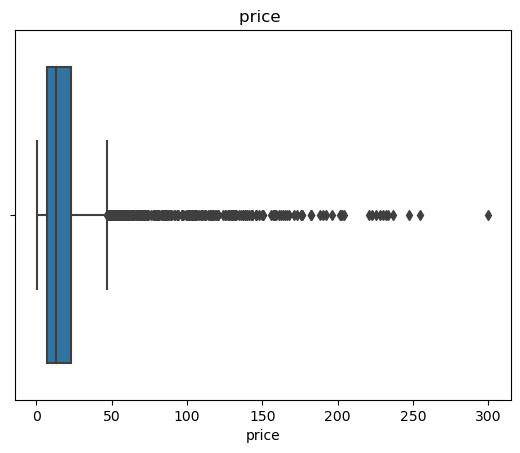

In [47]:
# Création du boxplot avec seaborn
sns.boxplot(x=produits['price'])

# Ajout d'un titre au graphique
plt.title('price ')

# Affichage du graphique
plt.show()

On remarque un grand nombre d'outliers dans notre moustache supérieure, dus à notre échantillon conséquent et notre grande dispersion.
Determinons nos probables outliers avec la methode des ecarts interquartiles

In [48]:
# Méthode des écarts interquartiles

Q3 = round(np.percentile(produits["price"], 75), 1)
Q1 = round(np.percentile(produits["price"], 25), 1)
EI = round((Q3 - Q1),1)


Lim_Outliers_Sup = round((Q3 + EI * 1.5),1)

Lim_Outliers_Inf  = round((Q1 - EI * 1.5),1)


print(f"Le prix est considéré comme outlier s'il est en dessous de {Lim_Outliers_Inf}€ ou au-dessus de {Lim_Outliers_Sup}€.")

Le prix est considéré comme outlier s'il est en dessous de -17.0€ ou au-dessus de 47.0€.


In [49]:
# Création du DataFrame des outliers

outliers_df = produits[(produits["price"] < Lim_Outliers_Inf) | (produits["price"] > Lim_Outliers_Sup)]
outliers_df = outliers_df.sort_values(by="price")

outliers_df

,id_prod,price,categ
49,1_48,47.22,1
2965,1_620,47.30,1
3168,1_626,47.35,1
1506,1_254,47.69,1
953,1_664,47.83,1
...,...,...,...
2778,2_30,233.54,2
1435,2_167,236.99,2
394,2_158,247.22,2
724,2_76,254.44,2


On observe 300 outliers grâce à la méthode des écarts interquartiles, soit un peu plus de 9% de notre échantillon.

<div style="background-color: #FFE4C9; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">2.2-Analyse du chiffre d'affaire</h1>
</div>

<div style="background-color: #FFF7F1; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 16px;">2.2.1-CA total</h1>
</div>

In [50]:
# Chiffre d'affaires total:

CA_tot = round(df['price'].sum(),1)

print ("Le chiffre d'affaires total est de", CA_tot)

Le chiffre d'affaires total est de 12027663.1


Passons maintenant à l'analyse détaillée du chiffre d'affaires par référence et par client.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687534 entries, 0 to 687554
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     687534 non-null  object        
 1   date        687534 non-null  datetime64[ns]
 2   session_id  687534 non-null  object        
 3   client_id   687534 non-null  object        
 4   Année       687534 non-null  object        
 5   Mois        687534 non-null  object        
 6   Jours       687534 non-null  object        
 7   price       687534 non-null  float64       
 8   categ       687534 non-null  float64       
 9   sex         687534 non-null  object        
 10  birth       687534 non-null  int64         
 11  Âge         687534 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 68.2+ MB


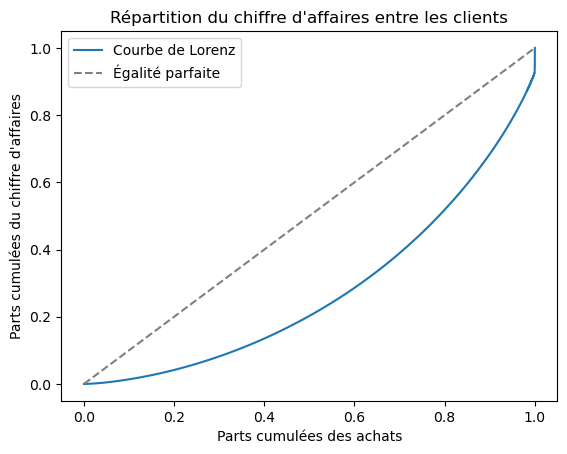

indice de Gini: 0.442


In [52]:
# Calculer le chiffre d'affaires par client
ca_par_client = df.groupby("client_id")["price"].sum()

# Trier et calculer la part cumulative du chiffre d'affaires total par client pour la courbe de Lorenz
lorenz_CA_client = np.cumsum(np.sort(ca_par_client)) / ca_par_client.sum()
lorenz_CA_client = np.append([0], lorenz_CA_client)

# Tracer la courbe de Lorenz
plt.plot(np.linspace(0, 1, len(lorenz_CA_client)), lorenz_CA_client, drawstyle="steps-post", label="Courbe de Lorenz")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--", label="Égalité parfaite")

plt.ylabel("Parts cumulées du chiffre d'affaires")
plt.xlabel("Parts cumulées des achats")
plt.title("Répartition du chiffre d'affaires entre les clients")
plt.legend()
plt.show()

# Calculer l'indice de Gini
aire_ss_courbe_CA_client = lorenz_CA_client[:-1].sum() / len(lorenz_CA_client)
S_ca_client = 0.5 - aire_ss_courbe_CA_client
gini_CA_client = 2 * S_ca_client
print("indice de Gini:", round(gini_CA_client, 3))

L'indice de Gini de 0.442 indique une certaine modération dans l'inégalité de répartition du chiffre d'affaires entre les clients.

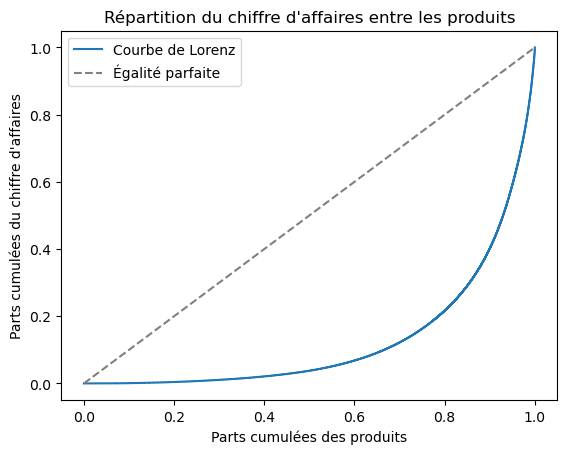

Indice de Gini pour la répartition du chiffre d'affaires par produit: 0.744


In [53]:
# Calculer le chiffre d'affaires par produit
ca_par_produit = df.groupby("id_prod")["price"].sum()

# Trier et calculer la part cumulative du chiffre d'affaires total par produit pour la courbe de Lorenz
lorenz_CA_produit = np.cumsum(np.sort(ca_par_produit)) / ca_par_produit.sum()
lorenz_CA_produit = np.append([0], lorenz_CA_produit)

# Tracer la courbe de Lorenz
plt.plot(np.linspace(0, 1, len(lorenz_CA_produit)), lorenz_CA_produit, drawstyle="steps-post", label="Courbe de Lorenz")
plt.plot([0, 1], [0, 1], color="grey", linestyle="--", label="Égalité parfaite")

plt.ylabel("Parts cumulées du chiffre d'affaires")
plt.xlabel("Parts cumulées des produits")
plt.title("Répartition du chiffre d'affaires entre les produits")
plt.legend()
plt.show()

# Calculer l'indice de Gini
aire_ss_courbe_CA_produit = lorenz_CA_produit[:-1].sum() / len(lorenz_CA_produit)
S_ca_produit = 0.5 - aire_ss_courbe_CA_produit
gini_CA_produit = 2 * S_ca_produit
print("Indice de Gini pour la répartition du chiffre d'affaires par produit:", round(gini_CA_produit, 3))

- L'indice de Gini de 0.744 indique une forte inégalité dans la répartition du chiffre d'affaires entre les références de produits. 

Plus précisément, cela signifie qu'une proportion importante du chiffre d'affaires est générée par un petit nombre de références de produits. 

En observant la courbe de Lorenz, on remarque que seulement 10% des références de produits génèrent environ 50% du chiffre d'affaires total.

In [54]:
# chiffre d'affaires par référence de produit
ca_par_produit = df.groupby("id_prod")["price"].sum()

# références de produits par chiffre d'affaires en ordre décroissant
top_10_plus = ca_par_produit.sort_values(ascending=False).head(10)
print("top 10 references")
print(top_10_plus)


# références de produits par chiffre d'affaires en ordre croissant
top_10_moins = ca_par_produit.sort_values(ascending=True).head(10)
print("top flop references")
print(top_10_moins)

top 10 references
id_prod
2_159    94893.50
2_135    69334.95
2_112    65407.76
2_102    60736.78
2_209    56971.86
1_395    56617.47
1_369    56136.60
2_110    53846.25
1_383    53834.43
1_414    53522.18
Name: price, dtype: float64
top flop references
id_prod
0_1539    0.99
0_1284    1.38
0_1653    1.98
0_541     1.99
0_1601    1.99
0_807     1.99
0_1728    2.27
0_1498    2.48
0_898     2.54
0_1840    2.56
Name: price, dtype: float64


<div style="background-color: #FFF7F1; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 16px;">2.2.2-CA et les clients</h1>
</div>

- ### Creation d'un Dataframe axé client

In [55]:
# chiffre d'affaires par client pour chaque catégorie
CA_categ = df.groupby(['client_id', 'categ'])['price'].sum().unstack(fill_value=0)

# chiffre d'affaires total par client
CA_total_client = df.groupby('client_id')['price'].sum()

# Ajouter les colonnes 'sex' et 'Âge' 
client_df = df[['client_id', 'sex', 'Âge']].drop_duplicates().set_index('client_id')

# Ajouter le chiffre d'affaires total par client
client_df['CA_total_client'] = CA_total_client

# Ajouter le chiffre d'affaires par catégorie par client
client_df[['CA_cat_0', 'CA_cat_1', 'CA_cat_2']] = CA_categ

# Définir les tranches d'âge
bins = [18, 30, 45, 60, float('inf')]
labels = ['18-30 ans', '30-45 ans', '45-60 ans', '+ 60 ans']

#Ajouter la tranche d'âge 
client_df['Tranche_age'] = pd.cut(client_df['Âge'], bins=bins, labels=labels, right=False)

# DataFrame
client_df.head(10)

,sex,Âge,CA_total_client,CA_cat_0,CA_cat_1,CA_cat_2,Tranche_age
client_id,,,,,,,
c_4410,f,57,1376.82,501.56,729.27,145.99,45-60 ans
c_7839,f,49,568.92,227.15,341.77,0.00,45-60 ans
c_1699,f,40,190.60,152.44,38.16,0.00,30-45 ans
c_5961,f,62,1150.42,331.30,819.12,0.00,+ 60 ans
c_5320,m,81,396.53,163.87,232.66,0.00,+ 60 ans
c_415,m,31,2053.21,188.54,255.58,1609.09,30-45 ans
c_285,f,57,607.74,245.24,362.50,0.00,45-60 ans
c_160,f,46,777.75,383.15,394.60,0.00,45-60 ans
c_6446,m,53,567.71,60.46,507.25,0.00,45-60 ans


In [56]:
client_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8600 entries, c_4410 to c_84
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sex              8600 non-null   object  
 1   Âge              8600 non-null   int64   
 2   CA_total_client  8600 non-null   float64 
 3   CA_cat_0         8600 non-null   float64 
 4   CA_cat_1         8600 non-null   float64 
 5   CA_cat_2         8600 non-null   float64 
 6   Tranche_age      8600 non-null   category
dtypes: category(1), float64(4), int64(1), object(1)
memory usage: 478.9+ KB


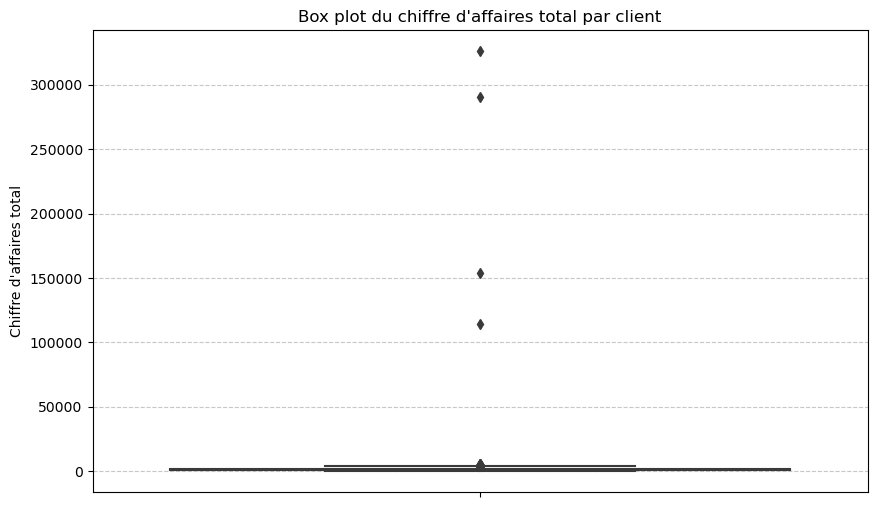

In [57]:
# Création d'un diagramme en boîte pour la variable CA_total_client
plt.figure(figsize=(10, 6))
sns.boxplot(data=client_df, y='CA_total_client', palette='crest')
plt.title("Box plot du chiffre d'affaires total par client")
plt.ylabel("Chiffre d'affaires total")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [58]:
top_10 = client_df.nlargest(10, 'CA_total_client')
top_10

,sex,Âge,CA_total_client,CA_cat_0,CA_cat_1,CA_cat_2,Tranche_age
client_id,,,,,,,
c_1609,m,44,326039.89,214447.24,110091.44,1501.21,30-45 ans
c_4958,m,25,290227.03,48.76,39841.93,250336.34,18-30 ans
c_6714,f,56,153918.60,57254.59,73566.22,23097.79,45-60 ans
c_3454,m,55,114110.57,28779.69,84055.66,1275.22,45-60 ans
c_1570,f,45,5285.82,2812.80,2327.03,145.99,45-60 ans
c_3263,f,39,5276.87,3399.29,1877.58,0.00,30-45 ans
c_2140,f,47,5260.18,3360.28,1753.91,145.99,45-60 ans
c_2899,f,30,5214.05,25.38,779.01,4409.66,30-45 ans
c_7319,f,50,5155.77,2936.17,2175.61,43.99,45-60 ans


 Nous remarquons que les quatre premiers se distinguent nettement du reste du top 10, affichant des chiffres d'affaires dépassant les 100 000 euros, voire les 300 000 euros pour le premier. 

Nous pouvons donc émettre l'hypothèse qu'il s'agit de professionnels. 

Pour une meilleure représentation de l'échantillon, nous exclurons ces clients de nos prochaines observations, étant donné qu'ils sont considérablement éloignés de la moyenne.
  

In [59]:
# Exclure les lignes correspondant aux client_id spécifiés

client_df2 = client_df.drop(['c_1609', 'c_4958', 'c_6714', 'c_3454'])

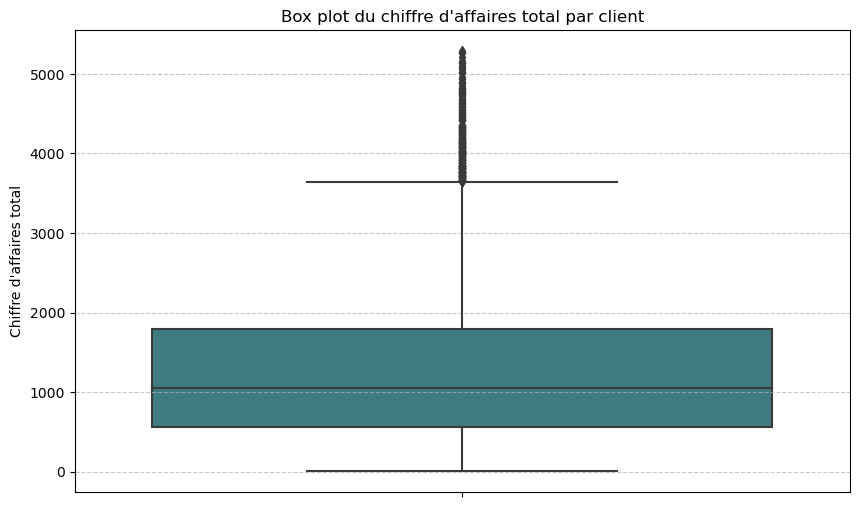

In [60]:
# Créer un diagramme en boîte avec Seaborn pour la variable CA_total_client
plt.figure(figsize=(10, 6))
sns.boxplot(data=client_df2, y='CA_total_client', palette='crest')
plt.title("Box plot du chiffre d'affaires total par client")
plt.ylabel("Chiffre d'affaires total")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

On observe toujours des valeurs extrêmes, mais elles sont nettement moins élevées depuis que nous avons exclu nos quatre premiers clients du top 10.

- ### Observons le CA/Genre

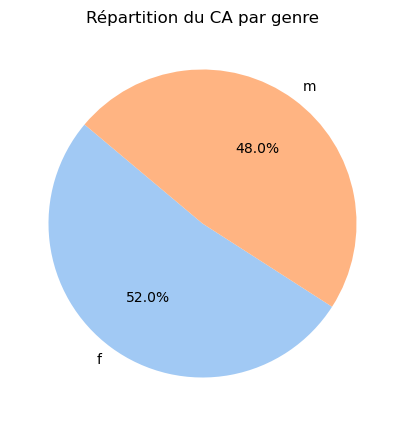

In [61]:
# Calcul du chiffre d'affaires total par genre
ca_par_genre = client_df2.groupby('sex')['CA_total_client'].sum()

colors = sns.color_palette("pastel")


plt.figure(figsize=(8, 5))
plt.pie(ca_par_genre, labels=ca_par_genre.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Répartition du CA par genre")
plt.show()

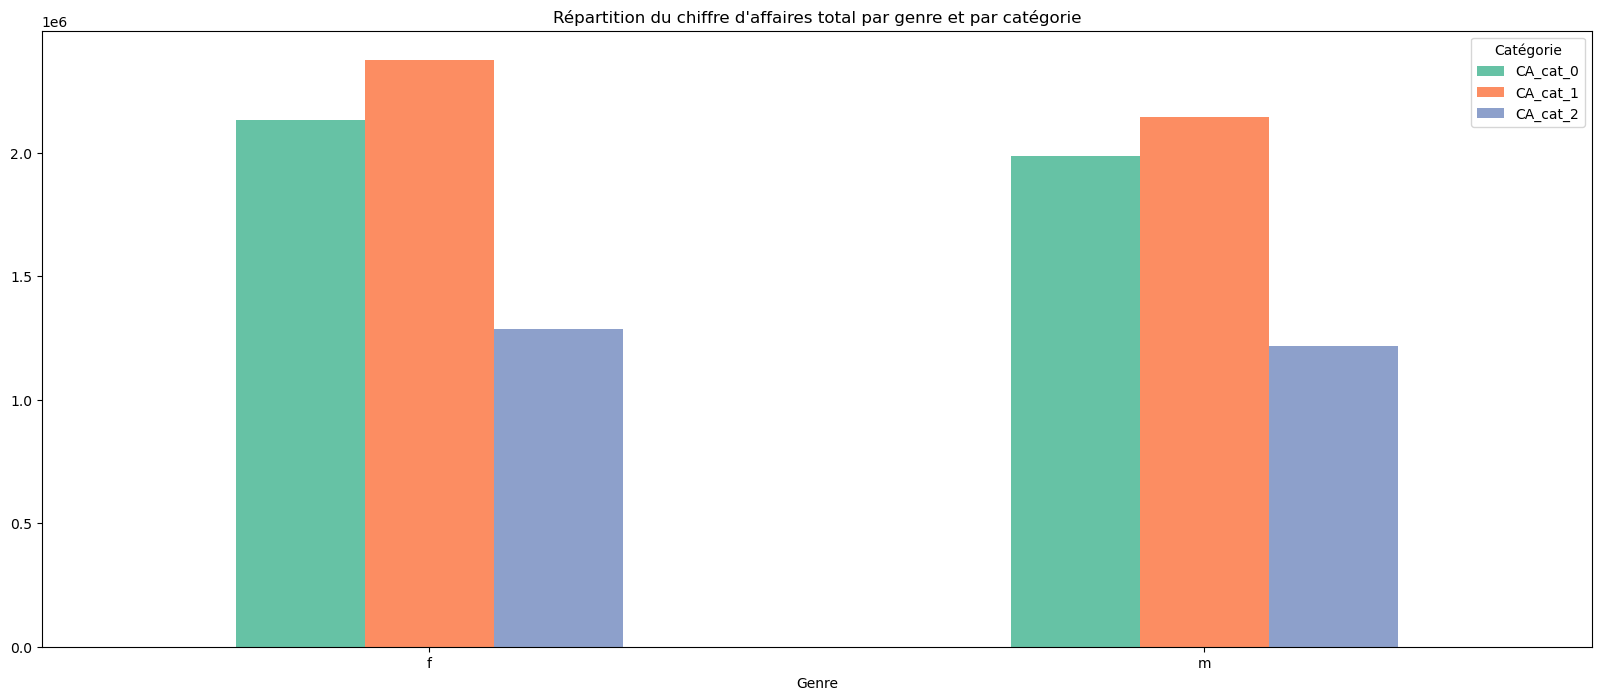

In [62]:
# Calculer le chiffre d'affaires total par genre et par catégorie
ca_par_genre_categorie = client_df2.groupby('sex')[['CA_cat_0', 'CA_cat_1', 'CA_cat_2']].sum()


palette = sns.color_palette("Set2")

# Création du graphique 
ca_par_genre_categorie.plot(kind='bar', stacked=False, figsize=(20, 8), color=palette)

plt.title("Répartition du chiffre d'affaires total par genre et par catégorie")
plt.xlabel("Genre")
plt.ylabel("")
plt.xticks(rotation=0)
plt.legend(title='Catégorie')
plt.show()


In [63]:
# Calculer le chiffre d'affaires total par genre et par catégorie
ca_par_genre_categorie = client_df2.groupby('sex')[['CA_cat_0', 'CA_cat_1', 'CA_cat_2']].sum()

# Afficher le df 
ca_par_genre_categorie

,CA_cat_0,CA_cat_1,CA_cat_2
sex,,,
f,2132758.48,2376011.35,1288155.25
m,1986442.21,2144090.51,1215909.21


Une répartition équilibrée.

In [64]:
# Grouper les données par tranche d'âge et sexe, puis calculer les proportions
proportions = client_df2.groupby(['Tranche_age', 'sex']).size().unstack(fill_value=0)
proportions['Total'] = proportions.sum(axis=1)
proportions['Proportion_M'] = (proportions['m'] / proportions['Total'])*100
proportions['Proportion_F'] = (proportions['f'] / proportions['Total'])*100

# Afficher le df
proportions

sex,f,m,Total,Proportion_M,Proportion_F
Tranche_age,,,,,
18-30 ans,928,860,1788,48.098434,51.901566
30-45 ans,1272,1211,2483,48.771647,51.228353
45-60 ans,1279,1144,2423,47.214197,52.785803
+ 60 ans,999,903,1902,47.476341,52.523659


Une repartion équilibré à nouveau.

- ### Observons le CA/Âge

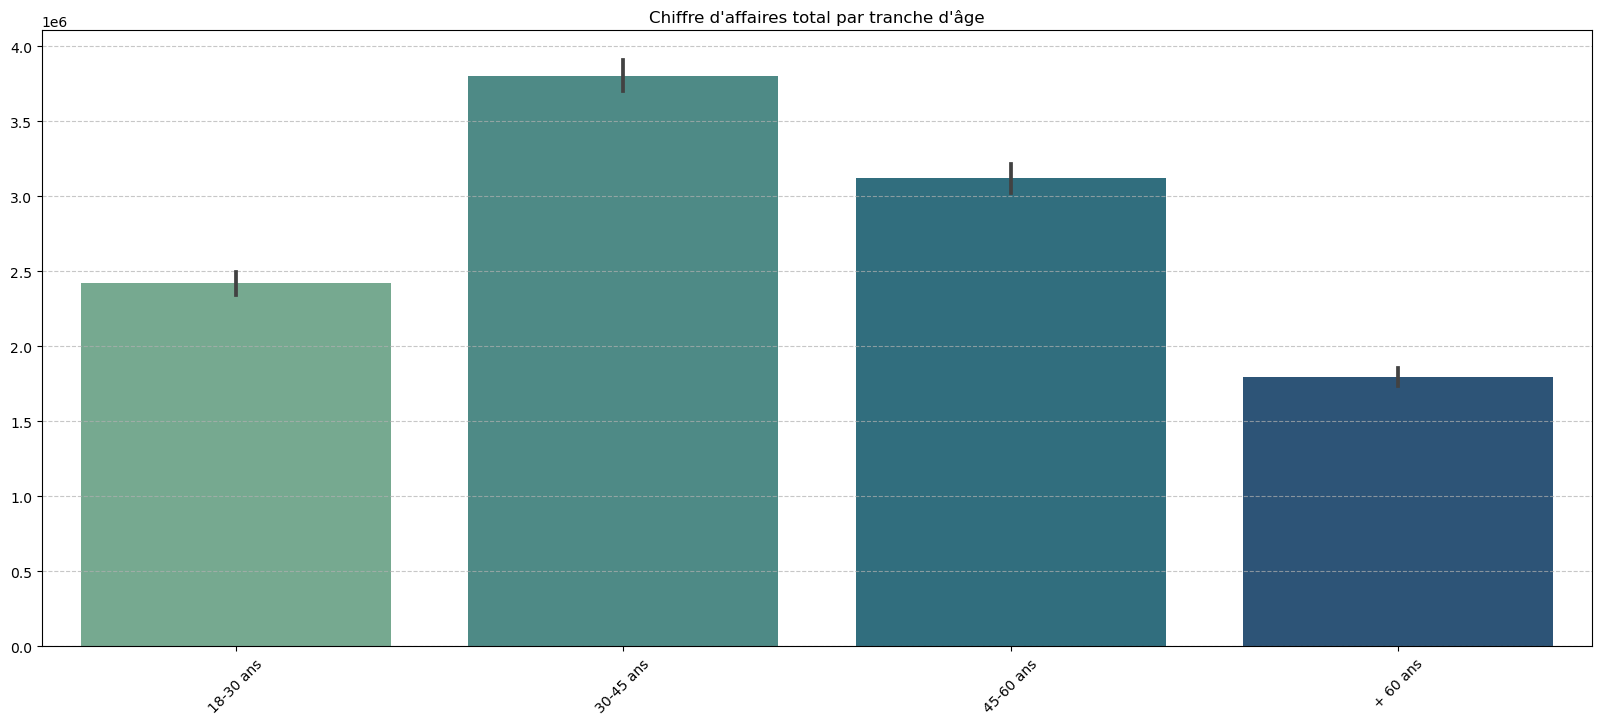

In [65]:
# Création d'un histogramme
plt.figure(figsize=(20, 8))
sns.barplot(data=client_df2, x='Tranche_age', y='CA_total_client', palette='crest', estimator=sum)
plt.title("Chiffre d'affaires total par tranche d'âge")
plt.ylabel("")
plt.xlabel("")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

La répartition du chiffre d'affaires est dominée par les tranches d'âge de 30 à 45 ans et de 45 à 60 ans. Cependant, vérifions tout de même que l'échantillon n'est pas déséquilibré

In [66]:
# Calculer le nombre de clients par tranche d'âge
nombre_clients_par_tranche_age = client_df['Tranche_age'].value_counts()

# Afficher le nombre de clients par tranche d'âge
nombre_clients_par_tranche_age

Tranche_age
30-45 ans    2484
45-60 ans    2425
+ 60 ans     1902
18-30 ans    1789
Name: count, dtype: int64

On remarque une population plus importante pour les 30-45 ans. Par exemple, il y a environ 28% moins de clients dans la tranche d'âge 18-30 ans par rapport à la tranche d'âge 30-45 ans, et environ 24% moins de clients dans la tranche d'âge +60 ans par rapport à la tranche d'âge 30-45 ans.

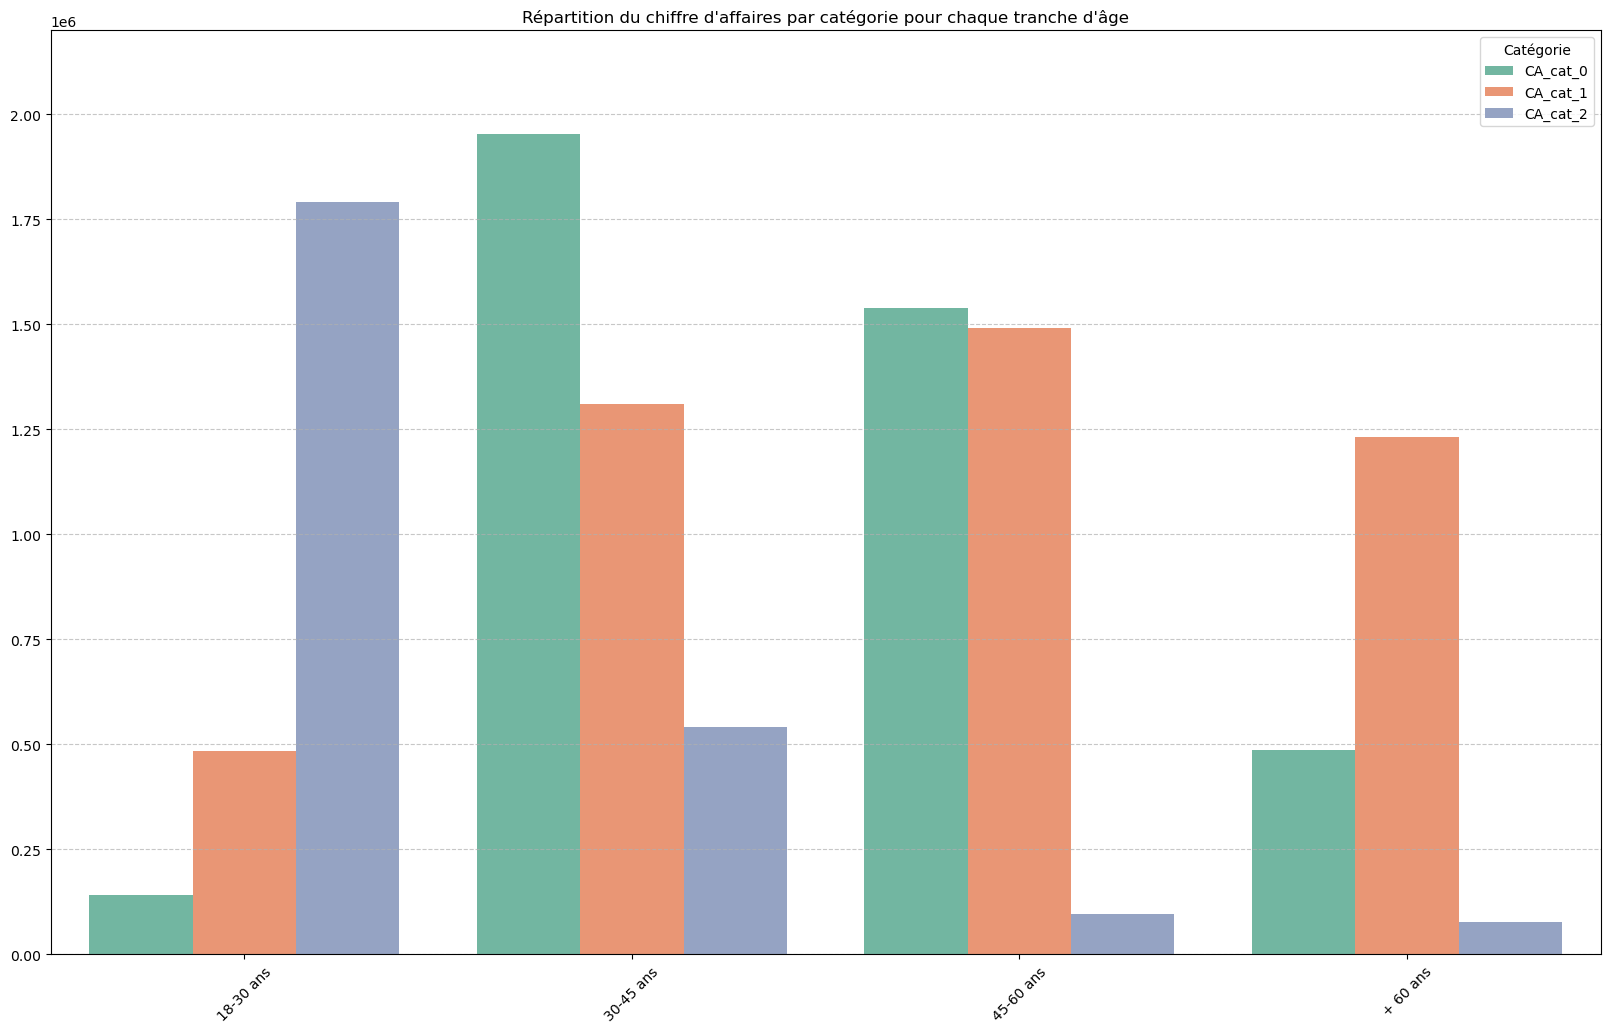

In [67]:
# Agréger les chiffres d'affaires par tranche d'âge et par catégorie
CA_tranche_age_cat = client_df2.groupby('Tranche_age').agg({
    'CA_cat_0': 'sum',
    'CA_cat_1': 'sum',
    'CA_cat_2': 'sum'
}).reset_index()


palette = sns.color_palette("Set2")

# Melt pour obtenir une structure de données adaptée à Seaborn
CA_tranche_age_cat_melted = CA_tranche_age_cat.melt(id_vars='Tranche_age', var_name='Catégorie', value_name='Chiffre d\'affaires')

# Création de l'histogramme
plt.figure(figsize=(20, 12))
sns.barplot(data=CA_tranche_age_cat_melted, x='Tranche_age', y='Chiffre d\'affaires', hue='Catégorie', palette=palette)

plt.title("Répartition du chiffre d'affaires par catégorie pour chaque tranche d'âge")
plt.ylabel("")
plt.xlabel("")
plt.legend(title='Catégorie', loc='upper right')  # Déplacer la légende vers le coin supérieur droit
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajuster l'échelle de l'axe y pour une meilleure lisibilité
plt.ylim(0, 2200000)  # Réglage de l'échelle y

plt.show()

In [68]:
print (CA_tranche_age_cat)

  Tranche_age    CA_cat_0    CA_cat_1    CA_cat_2
0   18-30 ans   142261.11   485185.78  1791910.71
1   30-45 ans  1952694.80  1311501.25   540372.68
2   45-60 ans  1538277.80  1491243.77    95632.41
3    + 60 ans   485966.98  1232171.06    76148.66


In [69]:
# Calculer le chiffre d'affaires total par tranche d'âge
CA_total_par_tranche_age = client_df2.groupby('Tranche_age')[['CA_cat_0', 'CA_cat_1', 'CA_cat_2']].sum()

# Calculer les pourcentages de chaque catégorie par rapport au chiffre d'affaires total dans chaque tranche d'âge
pourcentages_par_tranche_age = (CA_total_par_tranche_age.div(CA_total_par_tranche_age.sum(axis=1), axis=0) * 100).round(1)


pourcentages_par_tranche_age

,CA_cat_0,CA_cat_1,CA_cat_2
Tranche_age,,,
18-30 ans,5.9,20.1,74.1
30-45 ans,51.3,34.5,14.2
45-60 ans,49.2,47.7,3.1
+ 60 ans,27.1,68.7,4.2


Une répartition déséquilibrée est clairement observable entre les catégories et les tranches d'âge.

<div style="background-color: #FFF7F1; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 16px;">2.2.3-Evolution du CA</h1>
</div>

- ### Mensuelle

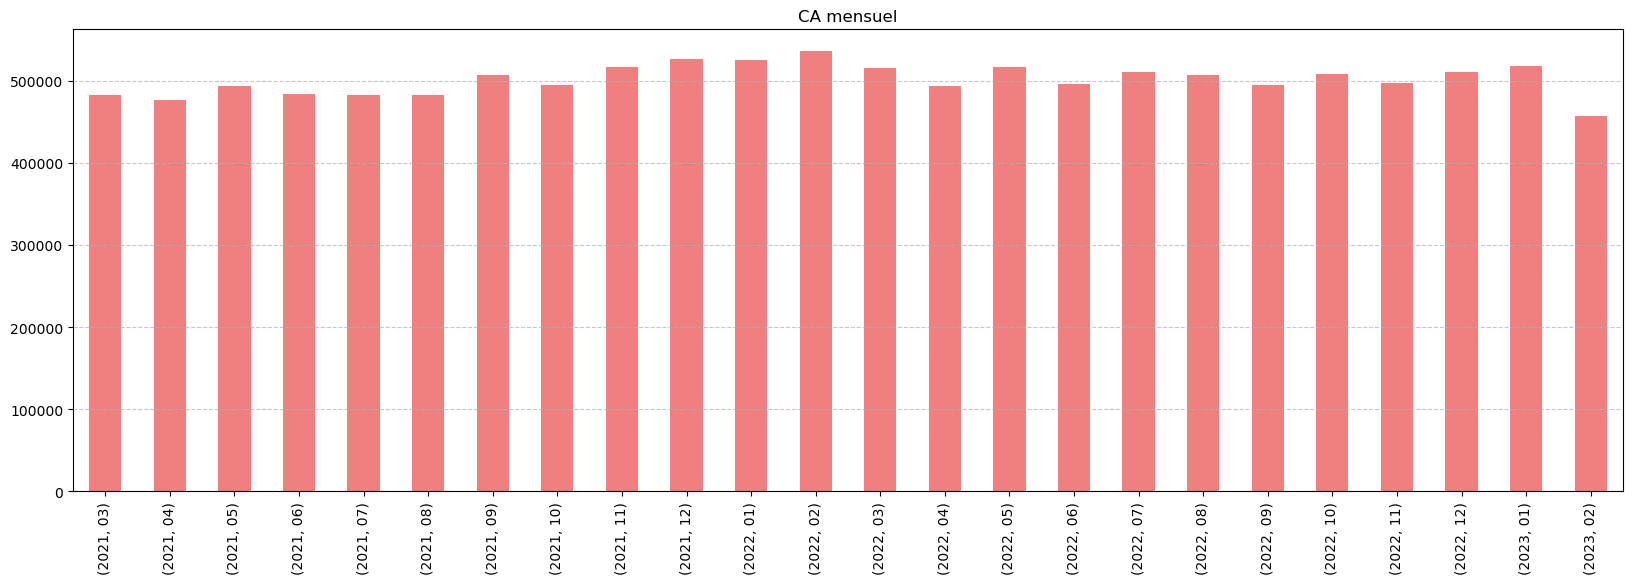

In [70]:
# Le chiffre d'affaires par mois pour chaque année
ca_par_annee_mois = df.groupby(['Année', 'Mois'])['price'].sum()


# Création d'un histogramme pour représenter le chiffre d'affaires par mois
plt.figure(figsize=(20, 6))
ca_par_annee_mois.plot(kind='bar', color='lightcoral')
plt.title("CA mensuel")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- ### Quotidienne

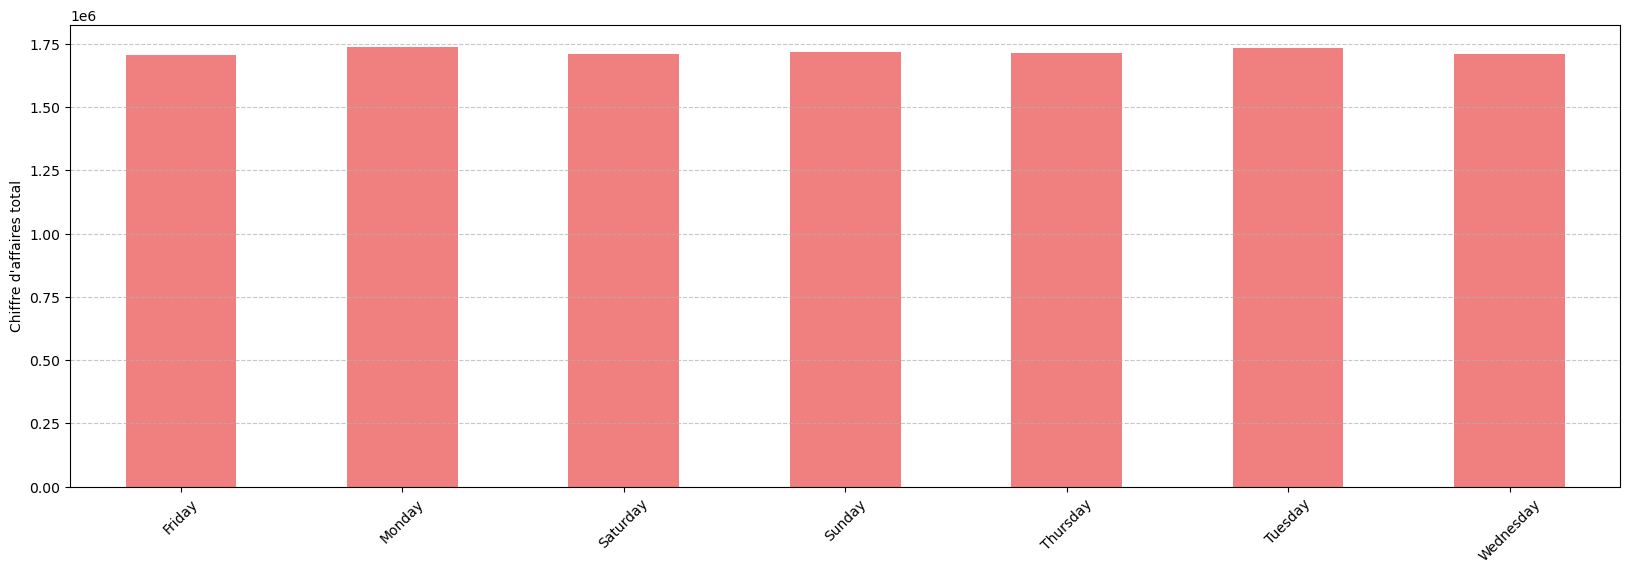

In [71]:
# Ajouter une colonne 'Jour_de_semaine' contenant le jour de la semaine
df['Jour_de_semaine'] = df['date'].dt.day_name()

# Regrouper les données par jour de la semaine et calculer le chiffre d'affaires total
ca_par_jour_de_semaine = df.groupby('Jour_de_semaine')['price'].sum()

# Création d'un histogramme pour représenter le chiffre d'affaires par jour de la semaine
plt.figure(figsize=(20, 6))
ca_par_jour_de_semaine.plot(kind='bar', color='lightcoral')
plt.title("")
plt.xlabel("")
plt.ylabel("Chiffre d'affaires total")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- ### Moyenne mobile

In [72]:
# Chiffre d'affaires total par mois
CA_mois = df.groupby(pd.Grouper(key='date', freq='M'))['price'].sum()

# Créer un DataFrame à partir du chiffre d'affaires mensuel
df_ca_mois = pd.DataFrame({'chiffre_affaires_mensuel': CA_mois})

# Afficher le DataFrame contenant le chiffre d'affaires par mois
print(df_ca_mois)

            chiffre_affaires_mensuel
date                                
2021-03-31                 482440.61
2021-04-30                 476109.30
2021-05-31                 492943.47
2021-06-30                 484088.56
2021-07-31                 482835.40
2021-08-31                 482284.79
2021-09-30                 507240.68
2021-10-31                 494733.16
2021-11-30                 516167.73
2021-12-31                 525917.28
2022-01-31                 525338.99
2022-02-28                 535571.50
2022-03-31                 515456.53
2022-04-30                 492998.94
2022-05-31                 517132.60
2022-06-30                 496016.12
2022-07-31                 510783.12
2022-08-31                 506467.27
2022-09-30                 494114.53
2022-10-31                 507917.77
2022-11-30                 496664.94
2022-12-31                 510219.50
2023-01-31                 517540.55
2023-02-28                 456679.76


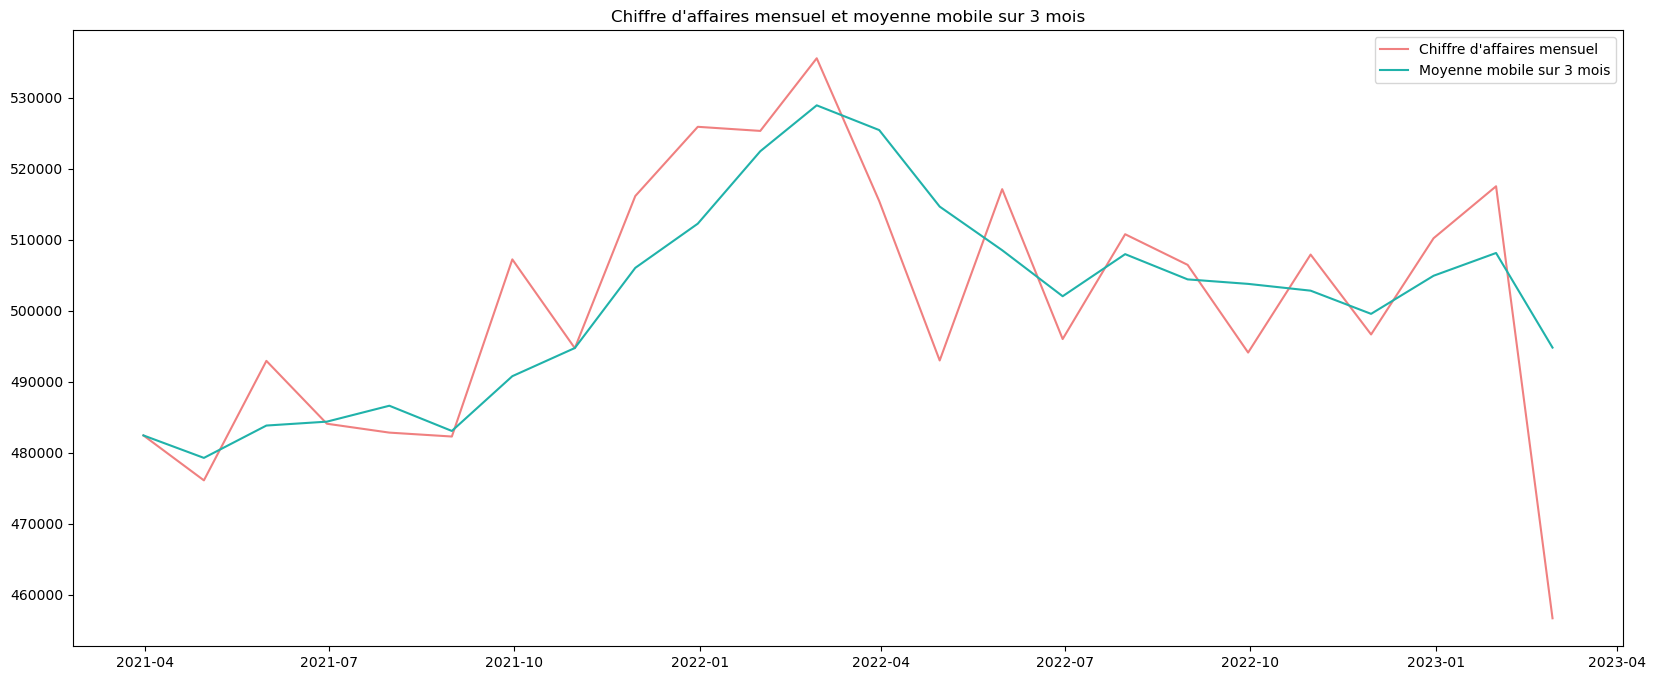

In [73]:
# Récupérer les données avec le chiffre d'affaires mensuel
df_ca_mois = pd.DataFrame({'date': CA_mois.index, 'chiffre_affaires_mensuel': CA_mois.values})

# Calculer la moyenne mobile sur une fenêtre de 3 mois
rolling_avg = df_ca_mois['chiffre_affaires_mensuel'].rolling(window=3, min_periods=1).mean()

# Tracer le chiffre d'affaires mensuel et la moyenne mobile
plt.figure(figsize=(20, 8))
plt.plot(df_ca_mois['date'], df_ca_mois['chiffre_affaires_mensuel'], label='Chiffre d\'affaires mensuel', color='lightcoral')
plt.plot(df_ca_mois['date'], rolling_avg, label='Moyenne mobile sur 3 mois', color='lightseagreen')
plt.xlabel('')
plt.ylabel('')
plt.title('Chiffre d\'affaires mensuel et moyenne mobile sur 3 mois')
plt.legend()
plt.show()

- ### Décomposition saisonnière

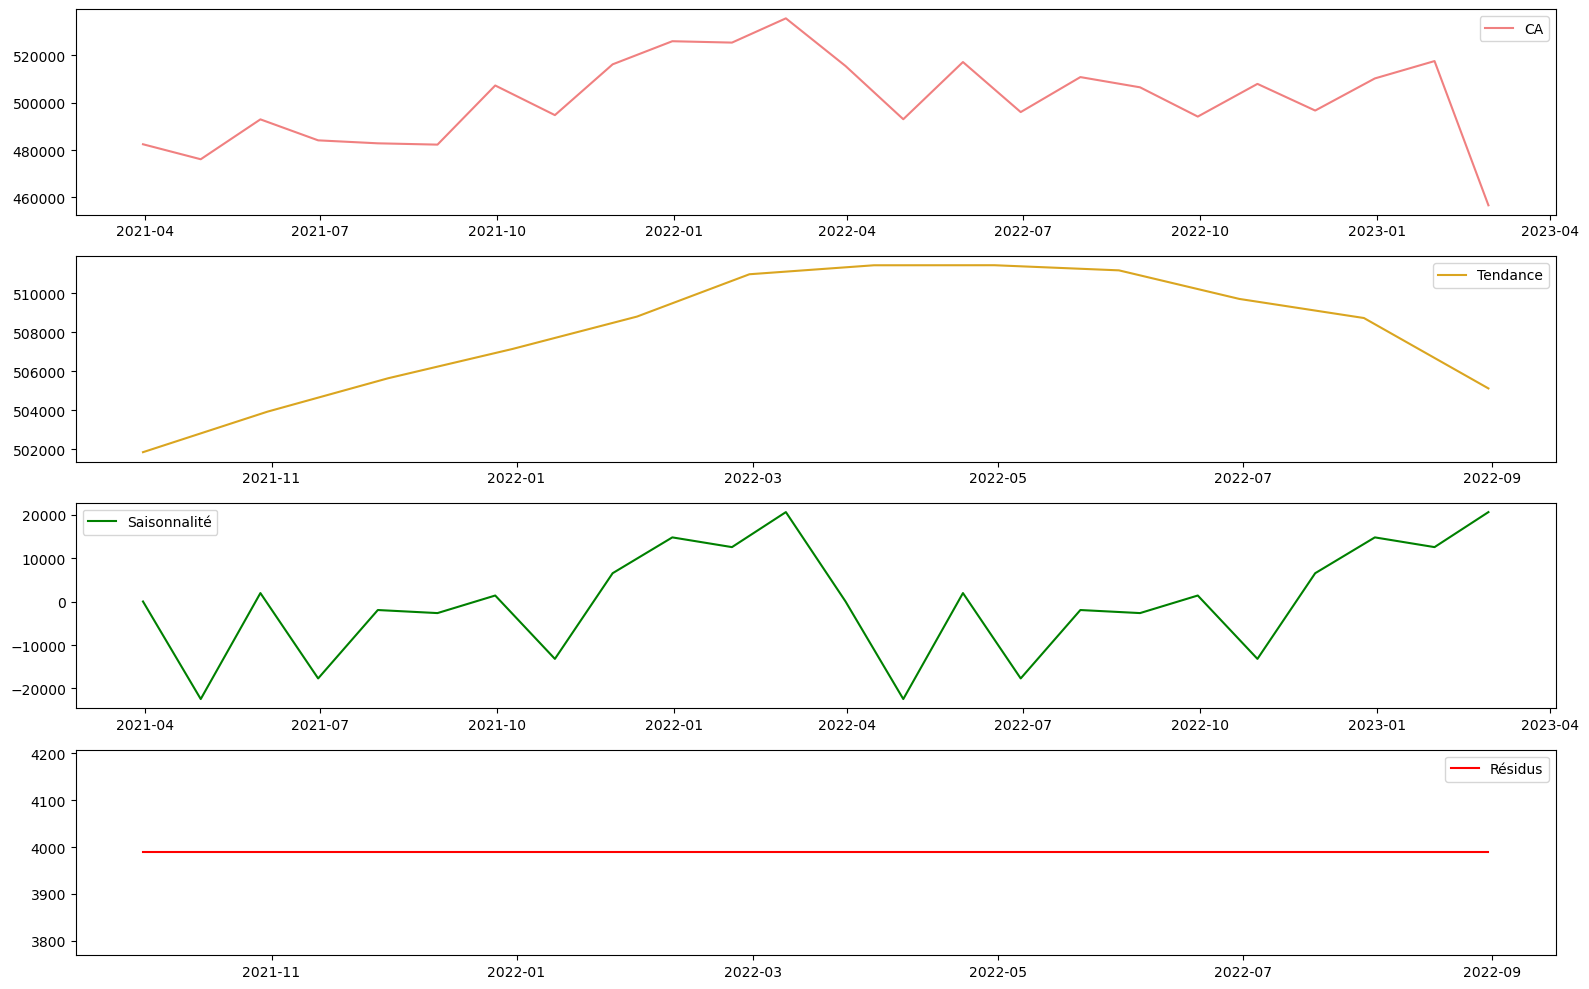

In [74]:
# décomposition saisonnière

decomposition = seasonal_decompose(CA_mois, model='additive', period=12)
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid
fig = plt.figure(figsize=(16, 10))
plt.subplot(411)
plt.plot(CA_mois, label='CA', color='lightcoral')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Tendance', color='goldenrod')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonality, label='Saisonnalité', color='green')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Résidus', color='red')  
plt.legend(loc='best')
plt.tight_layout()
plt.show()


- Une tendance haussière est observée de avril 2021 jusqu'à mars 2022, suivie d'une période de consolidation jusqu'à juin 2022, puis d'une tendance baissière jusqu'à septembre 2022.


- En ce qui concerne la saisonnalité, nous remarquons des variations régulières autour du niveau moyen, avec une période de 12 mois.


- Notre résidu plat suggère peu de fluctuations non expliquées persistant après avoir retiré les composantes saisonnières et de tendance. Cette observation renforce la validité du modèle et suggère que les variations observées dans le chiffre d'affaires peuvent être principalement attribuées à des tendances et des effets saisonniers plutôt qu'à des fluctuations aléatoires.

<div style="background-color: #E78895; color: dark; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 22px;">3-Tests Statistiques </h1>
</div>

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687534 entries, 0 to 687554
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id_prod          687534 non-null  object        
 1   date             687534 non-null  datetime64[ns]
 2   session_id       687534 non-null  object        
 3   client_id        687534 non-null  object        
 4   Année            687534 non-null  object        
 5   Mois             687534 non-null  object        
 6   Jours            687534 non-null  object        
 7   price            687534 non-null  float64       
 8   categ            687534 non-null  float64       
 9   sex              687534 non-null  object        
 10  birth            687534 non-null  int64         
 11  Âge              687534 non-null  int64         
 12  Jour_de_semaine  687534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 73.4+ MB


In [76]:
df2 = df.drop(df[df['client_id'].isin(['c_1609', 'c_4958', 'c_6714', 'c_3454'])].index)

<div style="background-color: #FFE4C9; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">3.1-Genre et categories</h1>
</div>


- Hypotheses

H0 : Il n'y a pas de lien entre le genre du client et la catégorie.

H1: Il existe un lien significatif entre le genre du client et la catégorie.

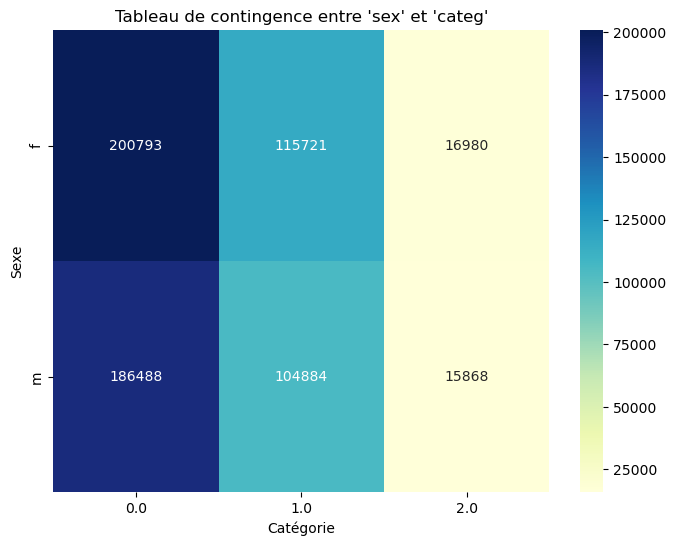

Résultats du test du chi2 :
Chi2 : 22.66856665178056
P-value : 1.1955928116587024e-05
Degrés de liberté : 2
Tableau attendu :
 [[201574.89662481 114822.13191434  17096.97146086]
 [185706.10337519 105782.86808566  15751.02853914]]

Coefficient de V de Cramer : 0.005742023164965101


In [77]:
# Création la table de contingence
contingency_table = pd.crosstab(df2['sex'], df2['categ'])

# heatmap du tableau de contingence
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Tableau de contingence entre 'sex' et 'categ'")
plt.xlabel("Catégorie")
plt.ylabel("Sexe")
plt.show()

# Test du chi2
chi2, p, dof, expected = st.chi2_contingency(contingency_table)

# Afficher les résultats du test du chi2
print("Résultats du test du chi2 :")
print("Chi2 :", chi2)
print("P-value :", p)
print("Degrés de liberté :", dof)
print("Tableau attendu :\n", expected)

# Calculer le coefficient de V de Cramer
cramer_v = np.sqrt(chi2 / (len(df) * min(contingency_table.shape[0]-1, contingency_table.shape[1]-1)))

# Afficher le coefficient de V de Cramer
print("\nCoefficient de V de Cramer :", cramer_v)


    


- Conclusion 
    
    La p-valeur très faible (<0,05) indique qu'il y a une association significative et que cette association n'est pas due au hasard. 
    Ainsi, nous rejetons l'hypothèse nulle selon laquelle le sexe des individus est indépendant de la catégorie des produits achetés.
    
    Cependant, le coefficient de Cramer est très bas, ce qui suggère une association faible entre le sexe des individus et la catégorie des produits achetés.
  
    

<div style="background-color: #FFE4C9; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">3.2-âge des clients/montant total d'achats</h1>
</div>

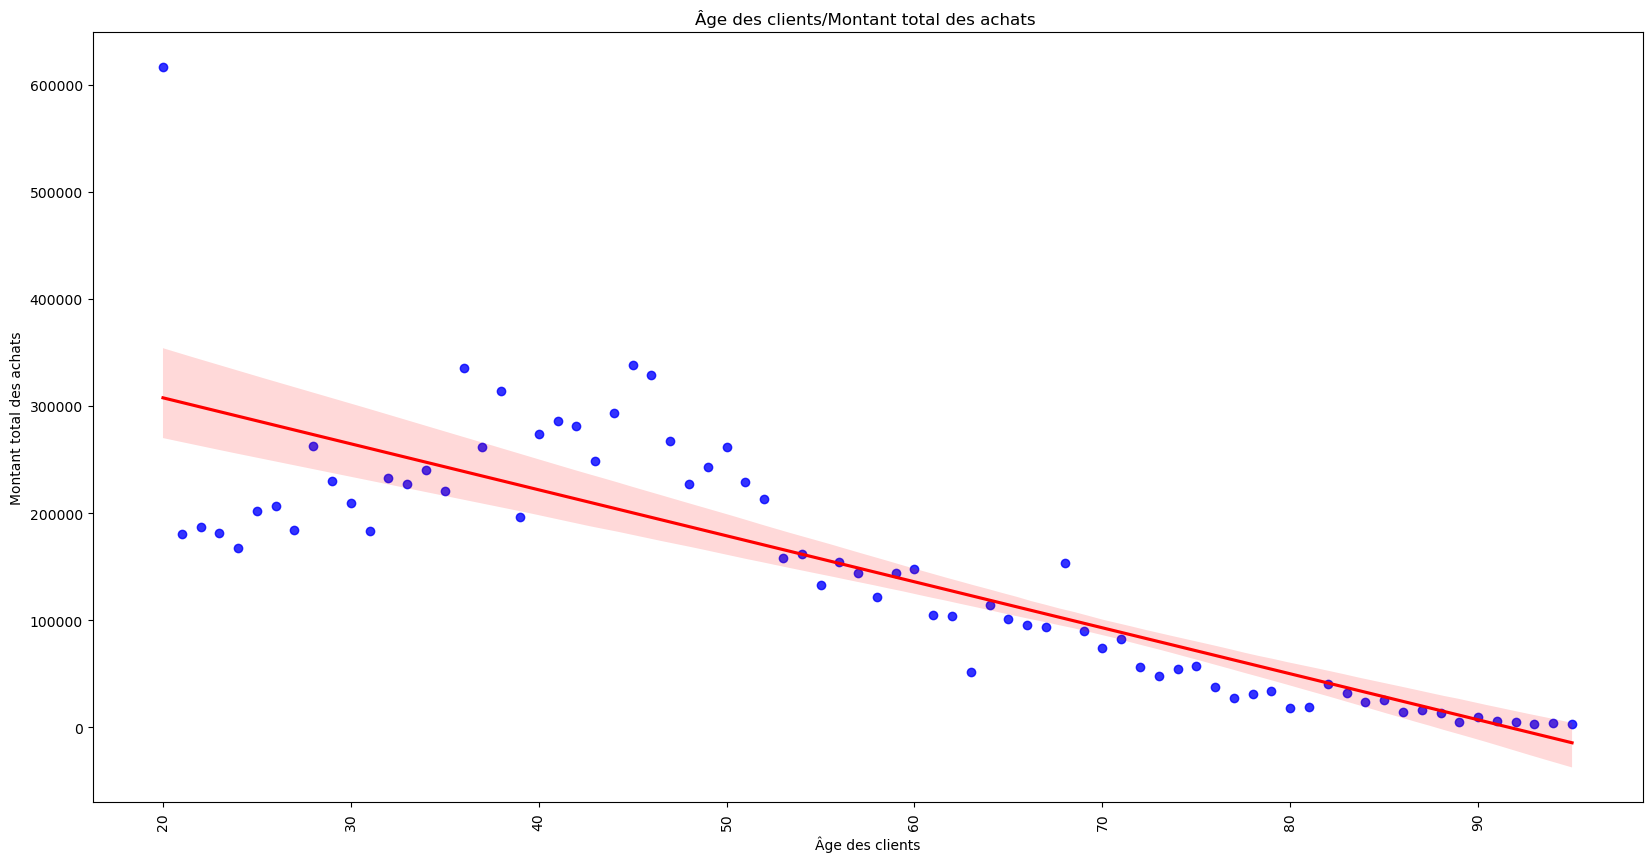

In [78]:
# Calculer le montant total des achats par âge
df_montant_total = client_df2.groupby('Âge')['CA_total_client'].sum().reset_index()

# Créer le nuage de points avec la droite de régression
plt.figure(figsize=(20,10))
sns.regplot(data=df_montant_total, x='Âge', y='CA_total_client', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Âge des clients/Montant total des achats ")
plt.xlabel("Âge des clients")
plt.ylabel("Montant total des achats")
plt.xticks(rotation=90)
plt.show()

Verifions la normalité de distribution nos variables

In [79]:
# test de normalité de Shapiro-Wilk

# Test de normalité pour la variable "Âge"
stat_age, p_value_age = shapiro(client_df2['Âge'])
print("Test de normalité pour la variable Âge :")
print("Statistique de test :", stat_age)
print("P-valeur :", p_value_age)

# Test de normalité pour la variable "Montant total des achats"
stat_montant, p_value_montant = shapiro(client_df2['CA_total_client'])
print("\nTest de normalité pour la variable Montant total des achats :")
print("Statistique de test :", stat_montant)
print("P-valeur :", p_value_montant)

Test de normalité pour la variable Âge :
Statistique de test : 0.9697333574295044
P-valeur : 4.62984948847373e-39

Test de normalité pour la variable Montant total des achats :
Statistique de test : 0.9042858481407166
P-valeur : 0.0


/Users/fatih/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [80]:
# Test de Kolmogorov-Smirnov pour l'âge
D_age, p_value_age_ks = kstest(client_df2['Âge'], 'norm')
print("Test de normalité pour la variable Âge :")
print("Statistique de test :", D_age)
print("P-valeur :", p_value_age_ks)

# Test de Kolmogorov-Smirnov pour le montant total des achats
D_montant, p_value_montant_ks = kstest(client_df2['CA_total_client'], 'norm')
print("\nTest de normalité pour la variable Montant total des achats :")
print("Statistique de test :", D_montant)
print("P-valeur :", p_value_montant_ks)

Test de normalité pour la variable Âge :
Statistique de test : 1.0
P-valeur : 0.0

Test de normalité pour la variable Montant total des achats :
Statistique de test : 0.9999999998604823
P-valeur : 0.0


 Nos deux variables ne sont pas distribuées selon une loi normale.

- Hypotheses

H0 : Il n'y a pas de lien entre l'âge et le montant total d'achat.

H1: Il existe un lien significatif entre l'âge et le montant total d'achat.

In [81]:
# Calcul du coefficient de corrélation de Spearman entre les variables "Âge" et "Montant total des achats"

corr_spearman, p_value_spearman = spearmanr(client_df2['Âge'], client_df2['CA_total_client'])
print("Coefficient de corrélation de Spearman ", corr_spearman)
print("P-valeur :", p_value_spearman)

Coefficient de corrélation de Spearman  -0.18453804793783096
P-valeur : 1.0212910436382683e-66


Le coefficient de corrélation de Spearman entre l'âge et le montant total des achats est estimé à environ -0.185, ce qui indique une corrélation monotone négative faible entre les deux variables.
 
La p-valeur associée est très proche de zéro, Cela signifie qu'il existe une relation significative entre l'âge des clients et le montant total de leurs achats, bien que cette relation soit faible.

En d'autres termes, plus l'âge des clients est élevé, moins leur montant total d'achats tend à être élevé, et vice versa.

<div style="background-color: #FFE4C9; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">3.3-âge des clients/fréquence d'achats</h1>
</div>

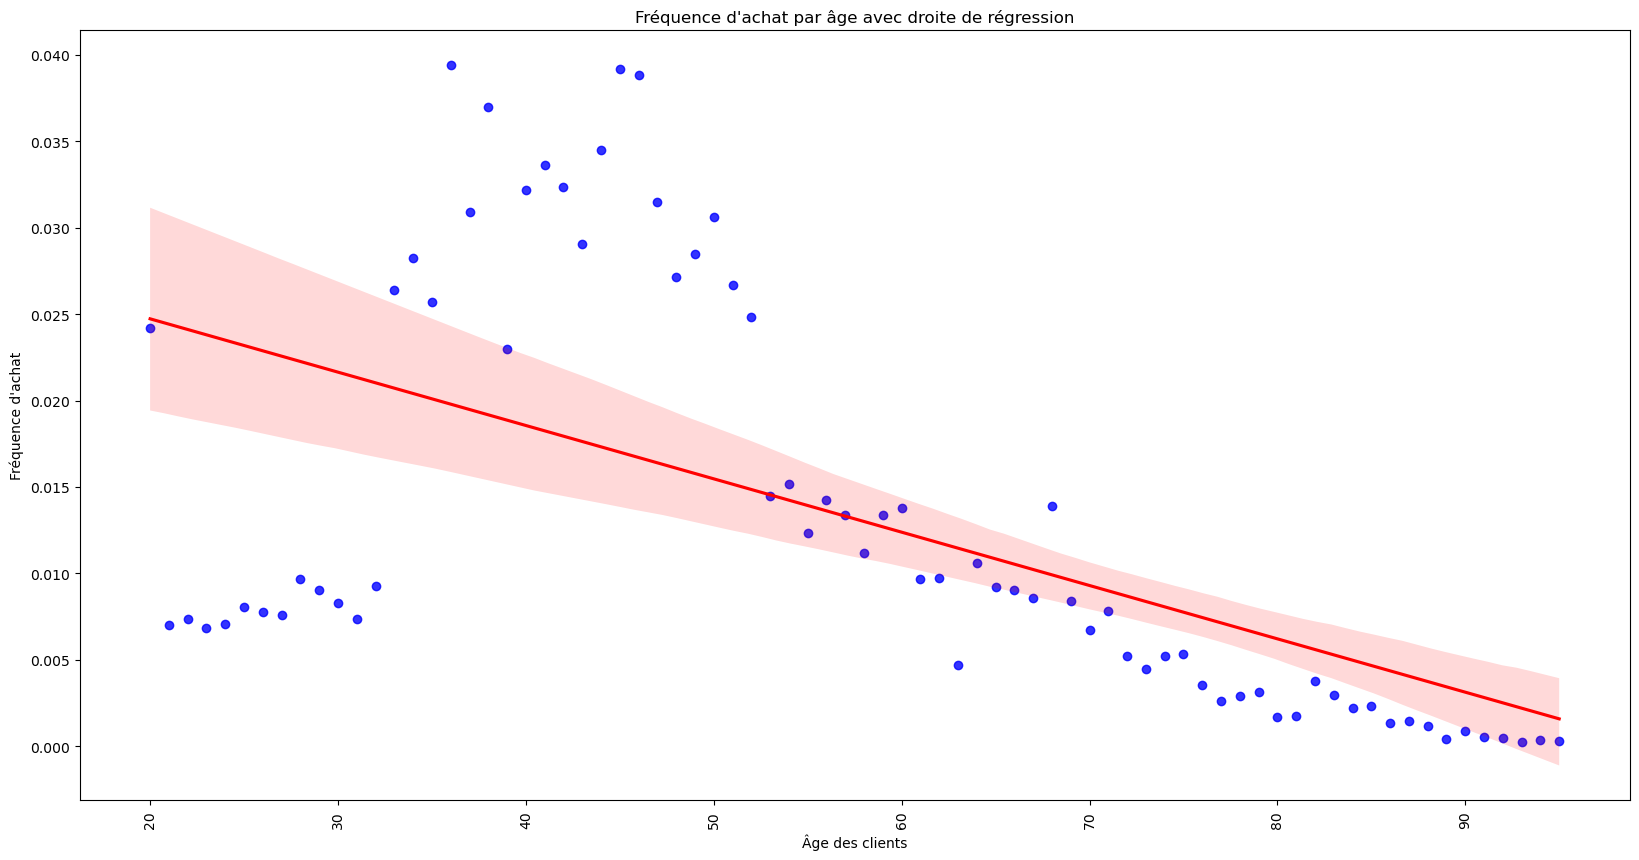

In [82]:
# Calcul de la fréquence d'achat par âge
df_frequence_achat = df2.groupby('Âge')['price'].count() / len(df2)

# Création du DataFrame df_frequence_achat avec l'index 'Âge' et la 'fréquence_achat'
df_frequence_achat = pd.DataFrame({'fréquence_achat': df_frequence_achat.values}, index=df_frequence_achat.index, columns=['fréquence_achat'])
df_frequence_achat.index.name = 'Âge'

# Création d'un nuage de points avec la droite de régression
plt.figure(figsize=(20, 10))
sns.regplot(data=df_frequence_achat.reset_index(), x='Âge', y='fréquence_achat', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Fréquence d'achat par âge avec droite de régression")
plt.xlabel("Âge des clients")
plt.ylabel("Fréquence d'achat")
plt.xticks(rotation=90)
plt.show()

D'un point vue descriptif on observe sur le graphique que plus on avance dans l'âge à partir de 30 ans et moins la fréquence d'achat est élevée .

Verifions ceci avec un test statistique mais avant tout vériions si notre distribution est gaussiene .

In [83]:
# test de normalité de Shapiro-Wilk sur l'âge
stat_age, p_value_age = shapiro(df2['Âge'])

# Afficher les résultats du test pour l'âge
print("Test de normalité pour l'âge :")
print("Statistique de test:", stat_age)
print("P-value:", p_value_age)


alpha = 0.05
if p_value_age > alpha:
    print("La distribution de l'âge semble être normale ")
else:
    print("La distribution de l'âge ne semble pas être normale ")

#  test de normalité de Shapiro-Wilk sur la fréquence d'achat
stat_freq, p_value_freq = shapiro(df_frequence_achat)

# Afficher les résultats du test pour la fréquence d'achat
print("\nTest de normalité pour la fréquence d'achat :")
print("Statistique de test:", stat_freq)
print("P-value:", p_value_freq)


if p_value_freq > alpha:
    print("La distribution de la fréquence d'achat semble être normale ")
else:
    print("La distribution de la fréquence d'achat ne semble pas être normale ")

Test de normalité pour l'âge :
Statistique de test: 0.971943736076355
P-value: 0.0
La distribution de l'âge ne semble pas être normale 

Test de normalité pour la fréquence d'achat :
Statistique de test: 0.8589646220207214
P-value: 5.637875801767223e-07
La distribution de la fréquence d'achat ne semble pas être normale 


/Users/fatih/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [100]:
# Test de normalité de Kolmogorov-Smirnov sur l'âge
D_age, p_value_age_ks = kstest(df2['Âge'], 'norm')


#Afficher les résultats du test
print("Test de normalité pour l'âge avec Kolmogorov-Smirnov :")
print("Statistique de test :", D_age)
print("P-value :", p_value_age_ks)


alpha = 0.05
if p_value_age_ks > alpha:
    print("La distribution de l'âge semble être normale")
else:
    print("La distribution de l'âge ne semble pas être normale")

# Test de normalité de Kolmogorov-Smirnov sur la fréquence d'achat
D_freq, p_value_freq_ks = kstest(df_frequence_achat['fréquence_achat'], 'norm')


#Afficher les résultats du test
print("\nTest de normalité pour la fréquence d'achat avec Kolmogorov-Smirnov :")
print("Statistique de test :", D_freq)
print("P-value :", p_value_freq_ks)


if p_value_freq_ks > alpha:
    print("La distribution de la fréquence d'achat semble être normale")
else:
    print("La distribution de la fréquence d'achat ne semble pas être normale")

Test de normalité pour l'âge avec Kolmogorov-Smirnov :
Statistique de test : 1.0
P-value : 0.0
La distribution de l'âge ne semble pas être normale

Test de normalité pour la fréquence d'achat avec Kolmogorov-Smirnov :
Statistique de test : 0.5001058476479671
P-value : 4.2087425289120086e-18
La distribution de la fréquence d'achat ne semble pas être normale


- Hypotheses

H0 : Il n'y a pas de lien entre l'âge et la fréquence d'achat.

H1: Il existe un lien significatif entre l'âge et la fréquence d'achat.

In [85]:
# Calculer le coefficient de corrélation de Spearman et sa p-valeur
corr_spearman, p_value_spearman = spearmanr(df_frequence_achat.index, df_frequence_achat['fréquence_achat'])

# Afficher les résultats du test
print("Coefficient de corrélation de Spearman:", corr_spearman)
print("P-value:", p_value_spearman)


alpha = 0.05
if p_value_spearman < alpha:
    if corr_spearman > 0:
        print("Il existe une corrélation positive significative entre l'âge et la fréquence d'achat.")
    elif corr_spearman < 0:
        print("Il existe une corrélation négative significative entre l'âge et la fréquence d'achat.")
    else:
        print("Il n'y a pas de corrélation significative entre l'âge et la fréquence d'achat.")
else:
    print("Il n'y a pas de corrélation significative entre l'âge et la fréquence d'achat.")


Coefficient de corrélation de Spearman: -0.6756527682843472
P-value: 2.146632000345534e-11
Il existe une corrélation négative significative entre l'âge et la fréquence d'achat.


<div style="background-color: #FFE4C9; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">3.4-âge des clients/panier moyen</h1>
</div>

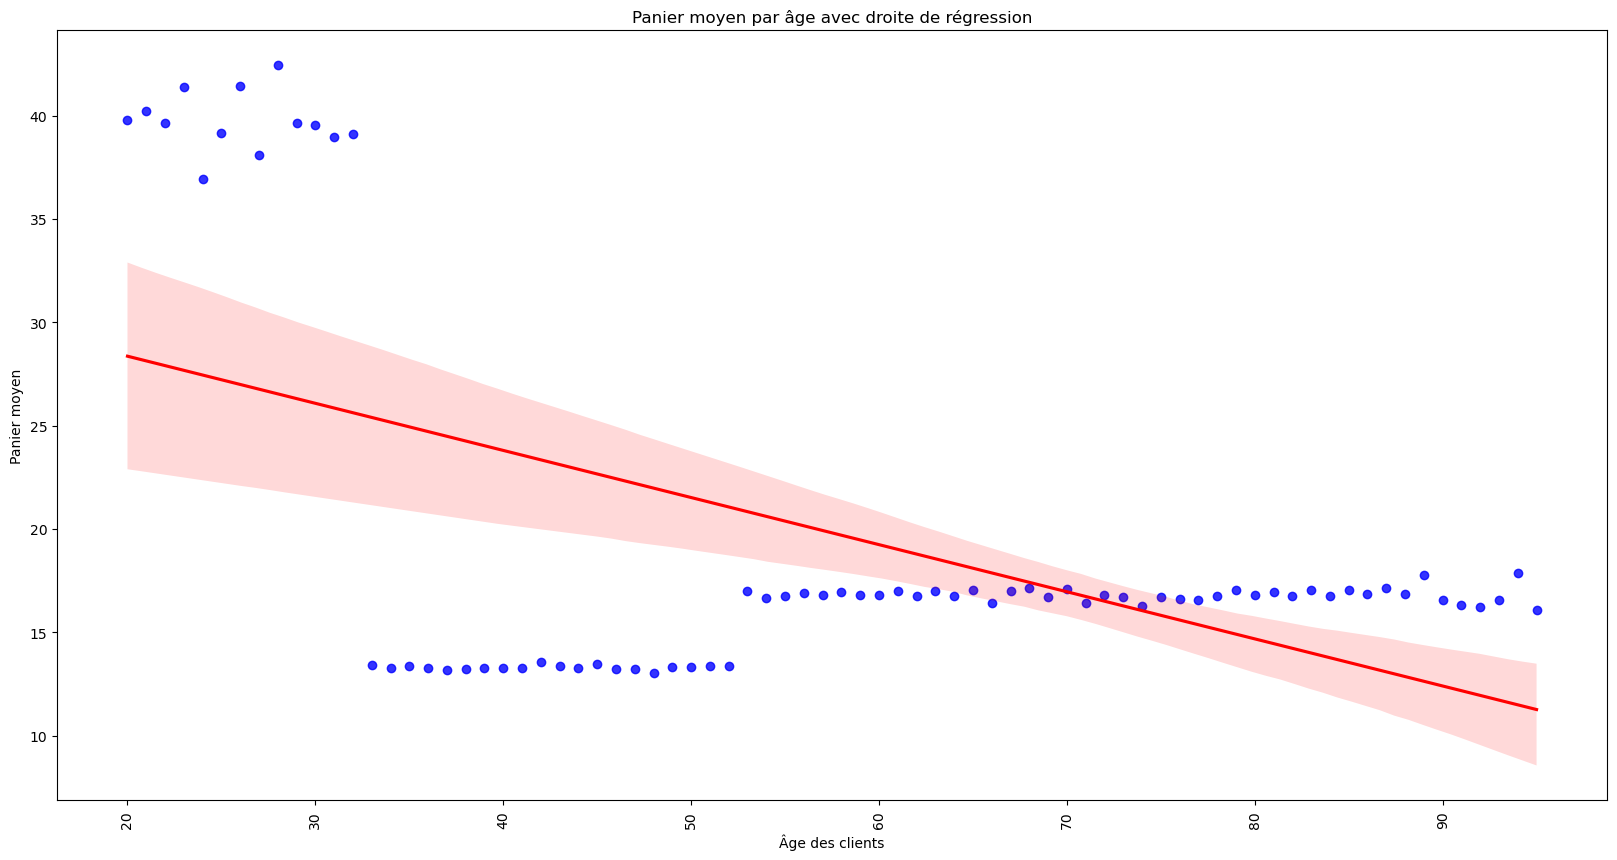

In [86]:
#Calcul du panier moyen en fonction de l'âge des clients

resultats_age = df2.groupby('Âge').agg({'price': ['sum', 'count']}).reset_index()
resultats_age.columns = ['Âge', 'Chiffre_affaires_total', 'Nombre_total_transactions']
resultats_age['Panier_moyen'] = resultats_age['Chiffre_affaires_total'] / resultats_age['Nombre_total_transactions']

## Création d'un nuage de points avec la droite de régression
plt.figure(figsize=(20,10))
sns.regplot(data=resultats_age, x='Âge', y='Panier_moyen', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title("Panier moyen par âge avec droite de régression")
plt.xlabel("Âge des clients")
plt.ylabel("Panier moyen")
plt.xticks(rotation=90)
plt.grid(False)
plt.show()



On observe des tranches d'âge pour le panier moyen, avec les 20-30 ans qui dominent, affichant un panier moyen de 40 euros, tandis que celui des 30-50 ans est de 13 euros et de 17 euros pour les 50-100 ans.  

Verifions ceci avec un test statistique mais avant tout vérifions si notre distribution est gaussiene .

In [88]:
# test de normalité de Shapiro-Wilk
stat, p_value = shapiro(resultats_age['Panier_moyen'])

# Afficher les résultats du test
print("Test de normalité de Shapiro pour le panier moyen :")
print("Statistique de test :", stat)
print("P-value :", p_value)

alpha = 0.05
if p_value > alpha:
    print("La distribution du panier moyen semble être normale.")
else:
    print("La distribution du panier moyen ne semble pas être normale.")

Test de normalité de Shapiro pour le panier moyen :
Statistique de test : 0.6062705516815186
P-value : 5.761508349404199e-13
La distribution du panier moyen ne semble pas être normale.


- Hypotheses 

H0 : Il n'y a pas de lien entre l'âge et le panier moyen.

H1: Il existe un lien significatif entre l'âge et le panier moyen.

In [90]:
# Calcul du coefficient de corrélation de Spearman et de sa p-valeur
correlation , p_value = spearmanr(resultats_age['Âge'], resultats_age['Panier_moyen'])

# Afficher les résultats
print("Coefficient de corrélation de Spearman entre l'âge et le panier moyen :", correlation)
print("P-valeur :", p_value)


alpha = 0.05
if p_value > alpha:
    print("Il n'y a pas de corrélation significative entre l'âge et le panier moyen")
else:
    print("Il y a une corrélation significative entre l'âge et le panier moyen")

Coefficient de corrélation de Spearman entre l'âge et le panier moyen : -0.0777306903622693
P-valeur : 0.5045034885212738
Il n'y a pas de corrélation significative entre l'âge et le panier moyen


La p-valeur associée est supérieurs alpha(>0,05), ce qui signifie qu'il n'y a pas suffisamment de preuves pour rejeter l'hypothèse nulle selon laquelle il n'y a pas de corrélation significative entre les deux variables.


<div style="background-color: #FFE4C9; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">3.5-âge des clients/categorie des livres achetés</h1>
</div>

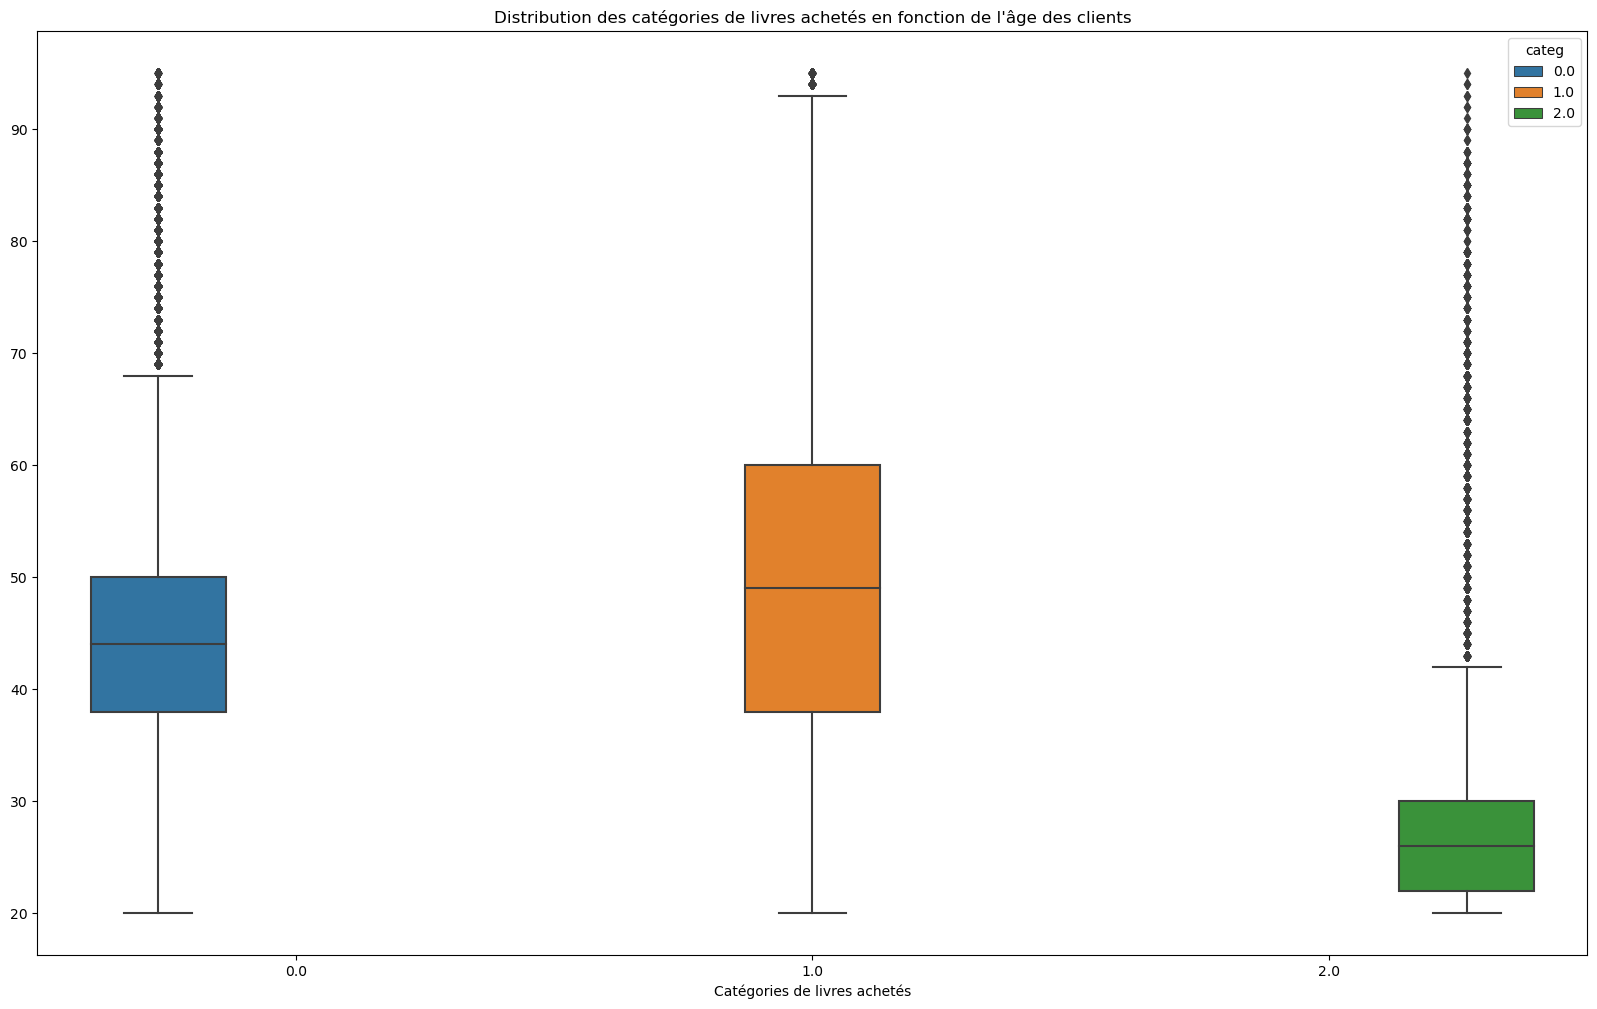

In [91]:
# Création du box plot
plt.figure(figsize=(20, 12))
sns.boxplot(x='categ', y='Âge', data=df2, hue='categ')

# Ajout de titres et d'étiquettes
plt.title("Distribution des catégories de livres achetés en fonction de l'âge des clients")
plt.xlabel("Catégories de livres achetés")
plt.ylabel("")

# Affichage du plot
plt.show()

In [93]:
# Ajuster un modèle linéaire aux données et test shapiro-wilk sur les résidus du modèle
model = ols('Âge ~ categ', data=df2).fit()
statistic_shapiro, p_value_shapiro = shapiro(model.resid)

# Afficher les résultats du test
print("Statistique de Shapiro-Wilk sur les résidus :", statistic_shapiro)
print("P-valeur sur les résidus :", p_value_shapiro)


alpha = 0.05
if p_value_shapiro > alpha:
    print("Les résidus suivent une distribution normale")
else:
    print("Les résidus ne suivent pas une distribution normale")

Statistique de Shapiro-Wilk sur les résidus : 0.9666518568992615
P-valeur sur les résidus : 0.0
Les résidus ne suivent pas une distribution normale


/Users/fatih/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [95]:
## Ajuster un modèle linéaire aux données et test de Kolmogorov-Smirnov sur les résidus du modèle

model = ols('Âge ~ categ', data=df2).fit()
st.kstest((model.resid),'norm') 

KstestResult(statistic=0.4939261915757417, pvalue=0.0, statistic_location=-2.0836636763166183, statistic_sign=1)

- Hypotheses

H0 : Il n'y a pas de lien entre l'âge et les catégories.

H1: Il existe un lien significatif entre l'âge et les catégories.

In [94]:
# Créer des dataframes pour chaque catégorie de livre
df_categ_0 = df2[df2['categ'] == 0]
df_categ_1 = df2[df2['categ'] == 1]
df_categ_2 = df2[df2['categ'] == 2]


# Appliquer le test de Kruskal-Wallis pour comparer les âges entre les catégories de livres
statistic_kw, p_value_kw = kruskal(df_categ_0['Âge'], df_categ_1['Âge'], df_categ_2['Âge'])

# Afficher les résultats du test
print("Statistique de Kruskal-Wallis :", statistic_kw)
print("P-valeur :", p_value_kw)

# Interpréter les résultats du test
alpha = 0.05
if p_value_kw > alpha:
    print("Il n'y a pas de différence significative entre les âges des clients pour les différentes catégories de livres (ne pas rejeter H0)")
else:
    print("Il y a une différence significative entre les âges pour les différentes catégories de livres ")

Statistique de Kruskal-Wallis : 71359.73412120914
P-valeur : 0.0
Il y a une différence significative entre les âges pour les différentes catégories de livres 


- La p-valeur est très proche de zéro (<0,05), ce qui signifie que nous rejetons l'hypothèse nulle (H0) selon laquelle il n'y a pas de différence entre les âges des clients pour les différentes catégories de livres. 

Par conséquent, nous pouvons conclure qu'il existe une association entre l'âge des clients et les catégories de livres achetées.